In [1]:
import sys
path_to_scripts = '../scripts'
sys.path.append(path_to_scripts)
import os
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import json
import argparse
from colorama import Fore, Style, init
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from transformers import AutoConfig, AutoModel, AutoTokenizer

root_dir = "/Users/peetz/Documents/GitHub/LLM_Thesis"
data_dir = Path(root_dir, "data")

combined = Path(data_dir, "pre-processed data","combined_dataset.json")


/Users/peetz/miniconda3/envs/LLM_Thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
df = pd.read_json(combined, orient="records", lines=True)

In [3]:
vertexSet = []
relations = []

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing data'):
    for ver in row['vertexSet']:
        for v in ver:
            vertexSet.append(v['type'])
    for rel in row['labels']:
        relations.append(rel['r'])

from collections import Counter
# Counting the occurrences of each relation and entity type
relation_counts = Counter(relations)
entity_counts = Counter(vertexSet)

# Creating DataFrames for plotting
relation_df = pd.DataFrame(relation_counts.items(), columns=['Relation', 'Count'])
entity_df = pd.DataFrame(entity_counts.items(), columns=['Entity', 'Count'])

Processing data: 100%|██████████| 181623/181623 [00:03<00:00, 47426.44it/s]


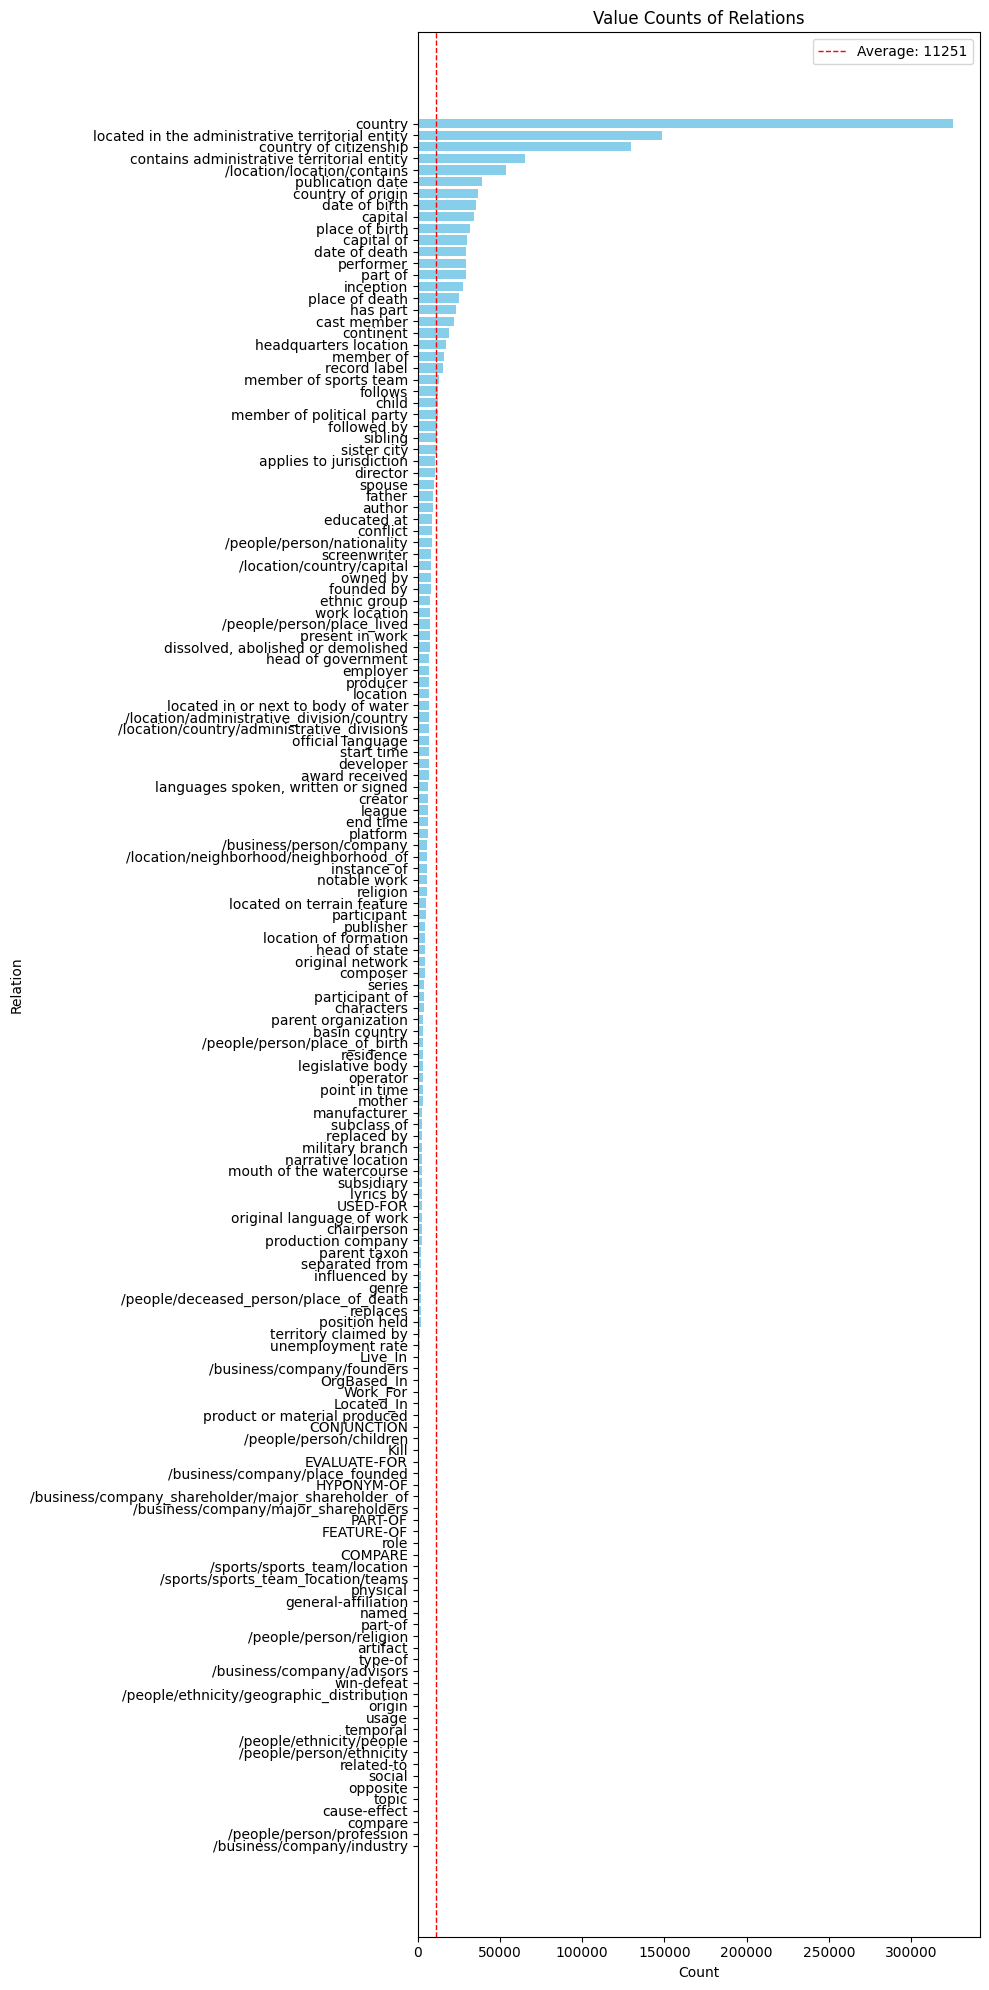

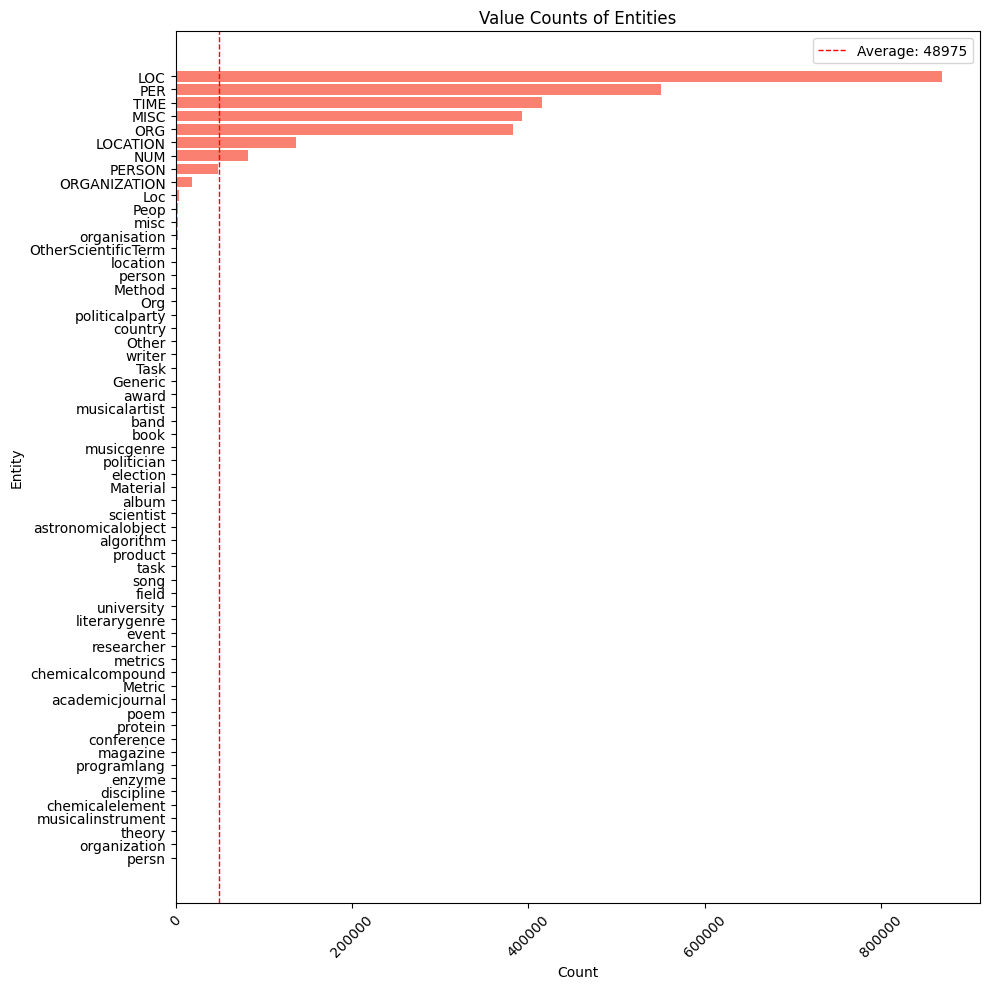

In [4]:
# Plotting the value counts of relations horizontally
relation_df = relation_df.sort_values(by='Count', ascending=True)
average_relation_count = relation_df['Count'].mean()

plt.figure(figsize=(10, 20))
plt.barh(relation_df['Relation'], relation_df['Count'], color='skyblue')
plt.axvline(average_relation_count, color='red', linestyle='--', linewidth=1, label=f'Average: {average_relation_count:.0f}')
plt.xlabel('Count')
plt.ylabel('Relation')
plt.title('Value Counts of Relations')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the value counts of entities
entity_df = entity_df.sort_values(by='Count', ascending=True)
average_entity_count = entity_df['Count'].mean()

plt.figure(figsize=(10, 10))
plt.barh(entity_df['Entity'], entity_df['Count'], color='salmon')
plt.axvline(average_entity_count, color='red', linestyle='--', linewidth=1, label=f'Average: {average_entity_count:.0f}')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Value Counts of Entities')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Extract domains and split
domains = list(set([row['domains'].split('-')[0] for idx, row in df.iterrows()])) # Get unique domains
domains

['news',
 'science',
 'general',
 'linguist',
 'General',
 'music',
 'politics',
 'literature',
 'NLP',
 'ai']

Processing data: 100%|██████████| 181623/181623 [00:04<00:00, 40236.20it/s]


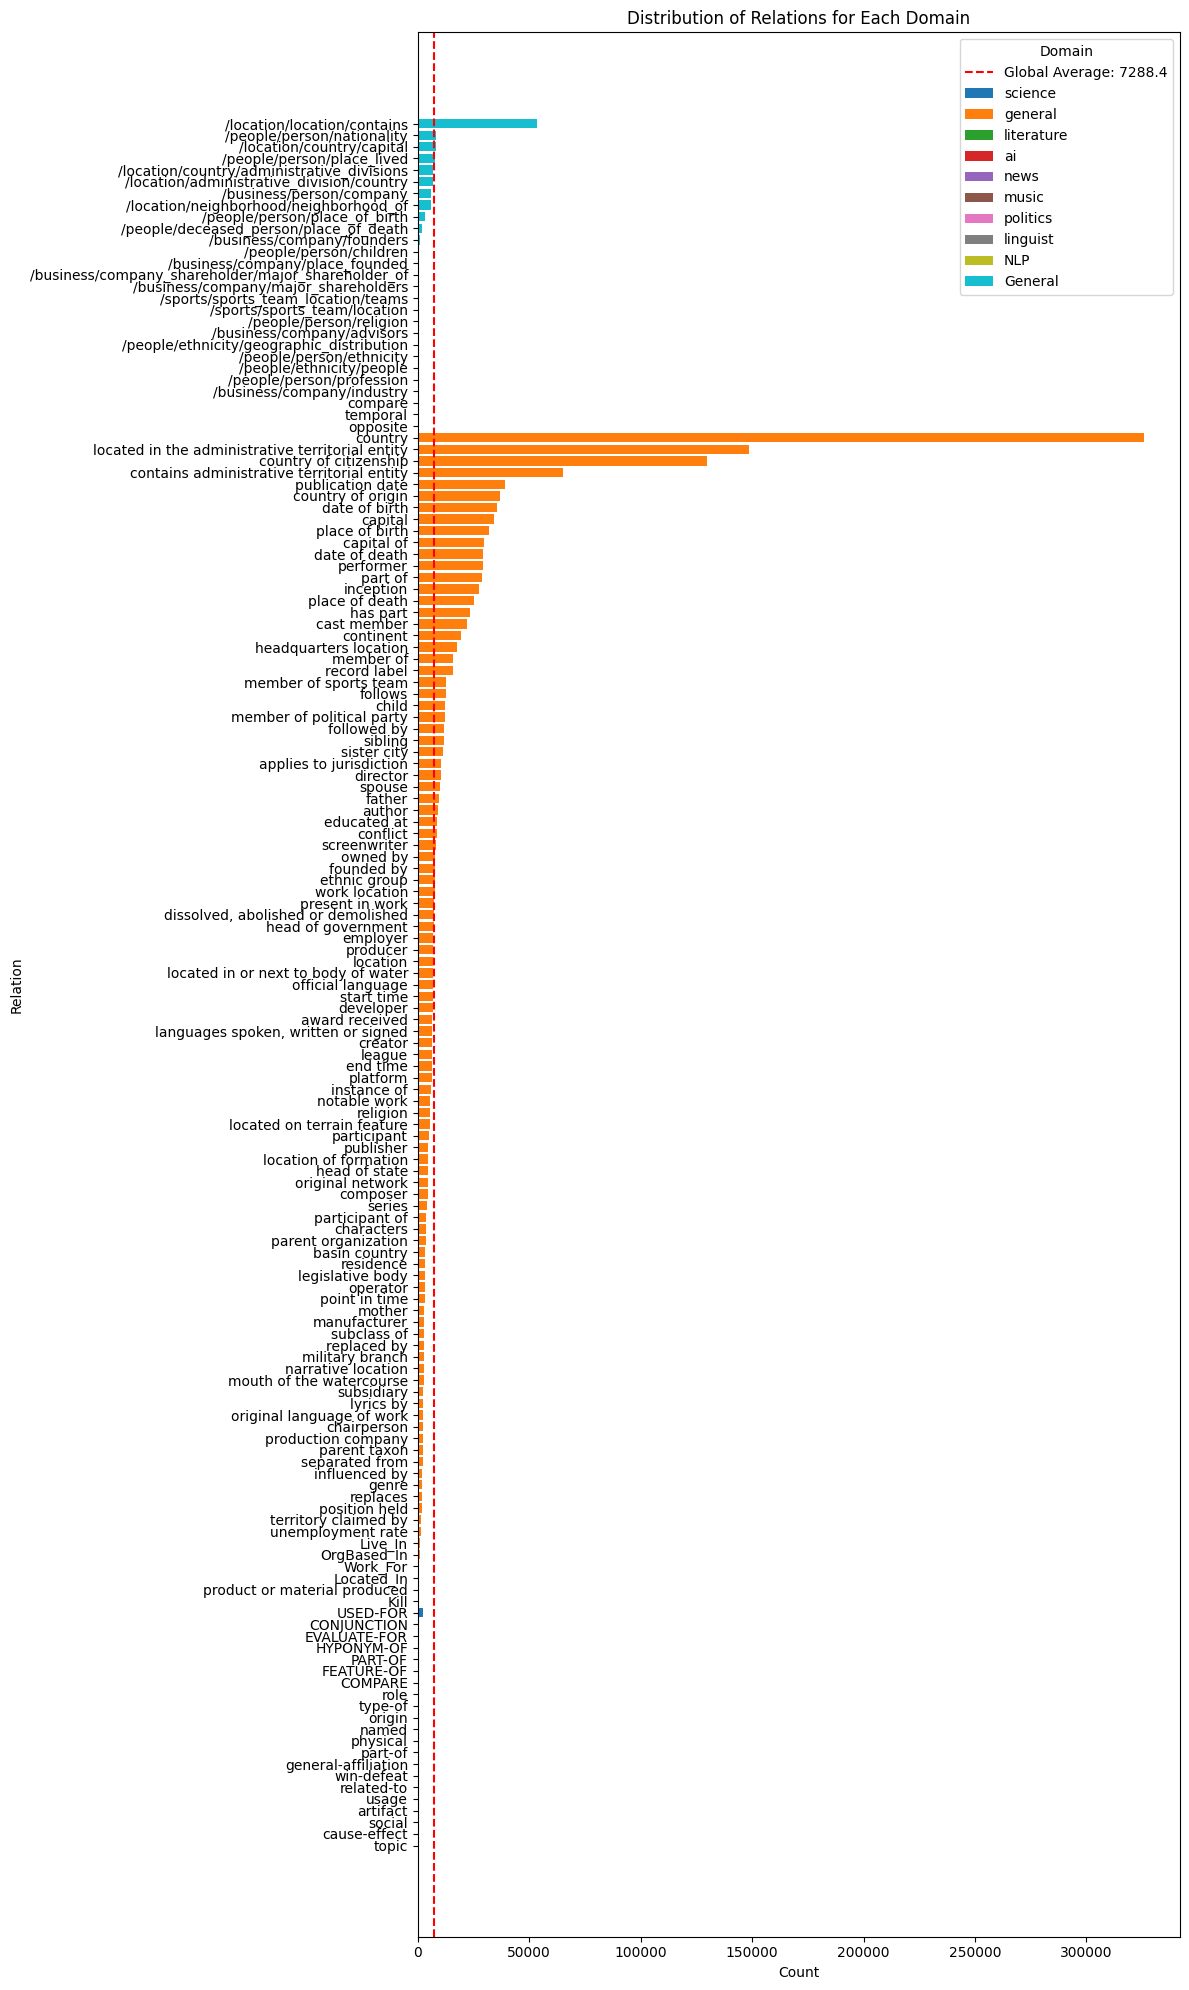

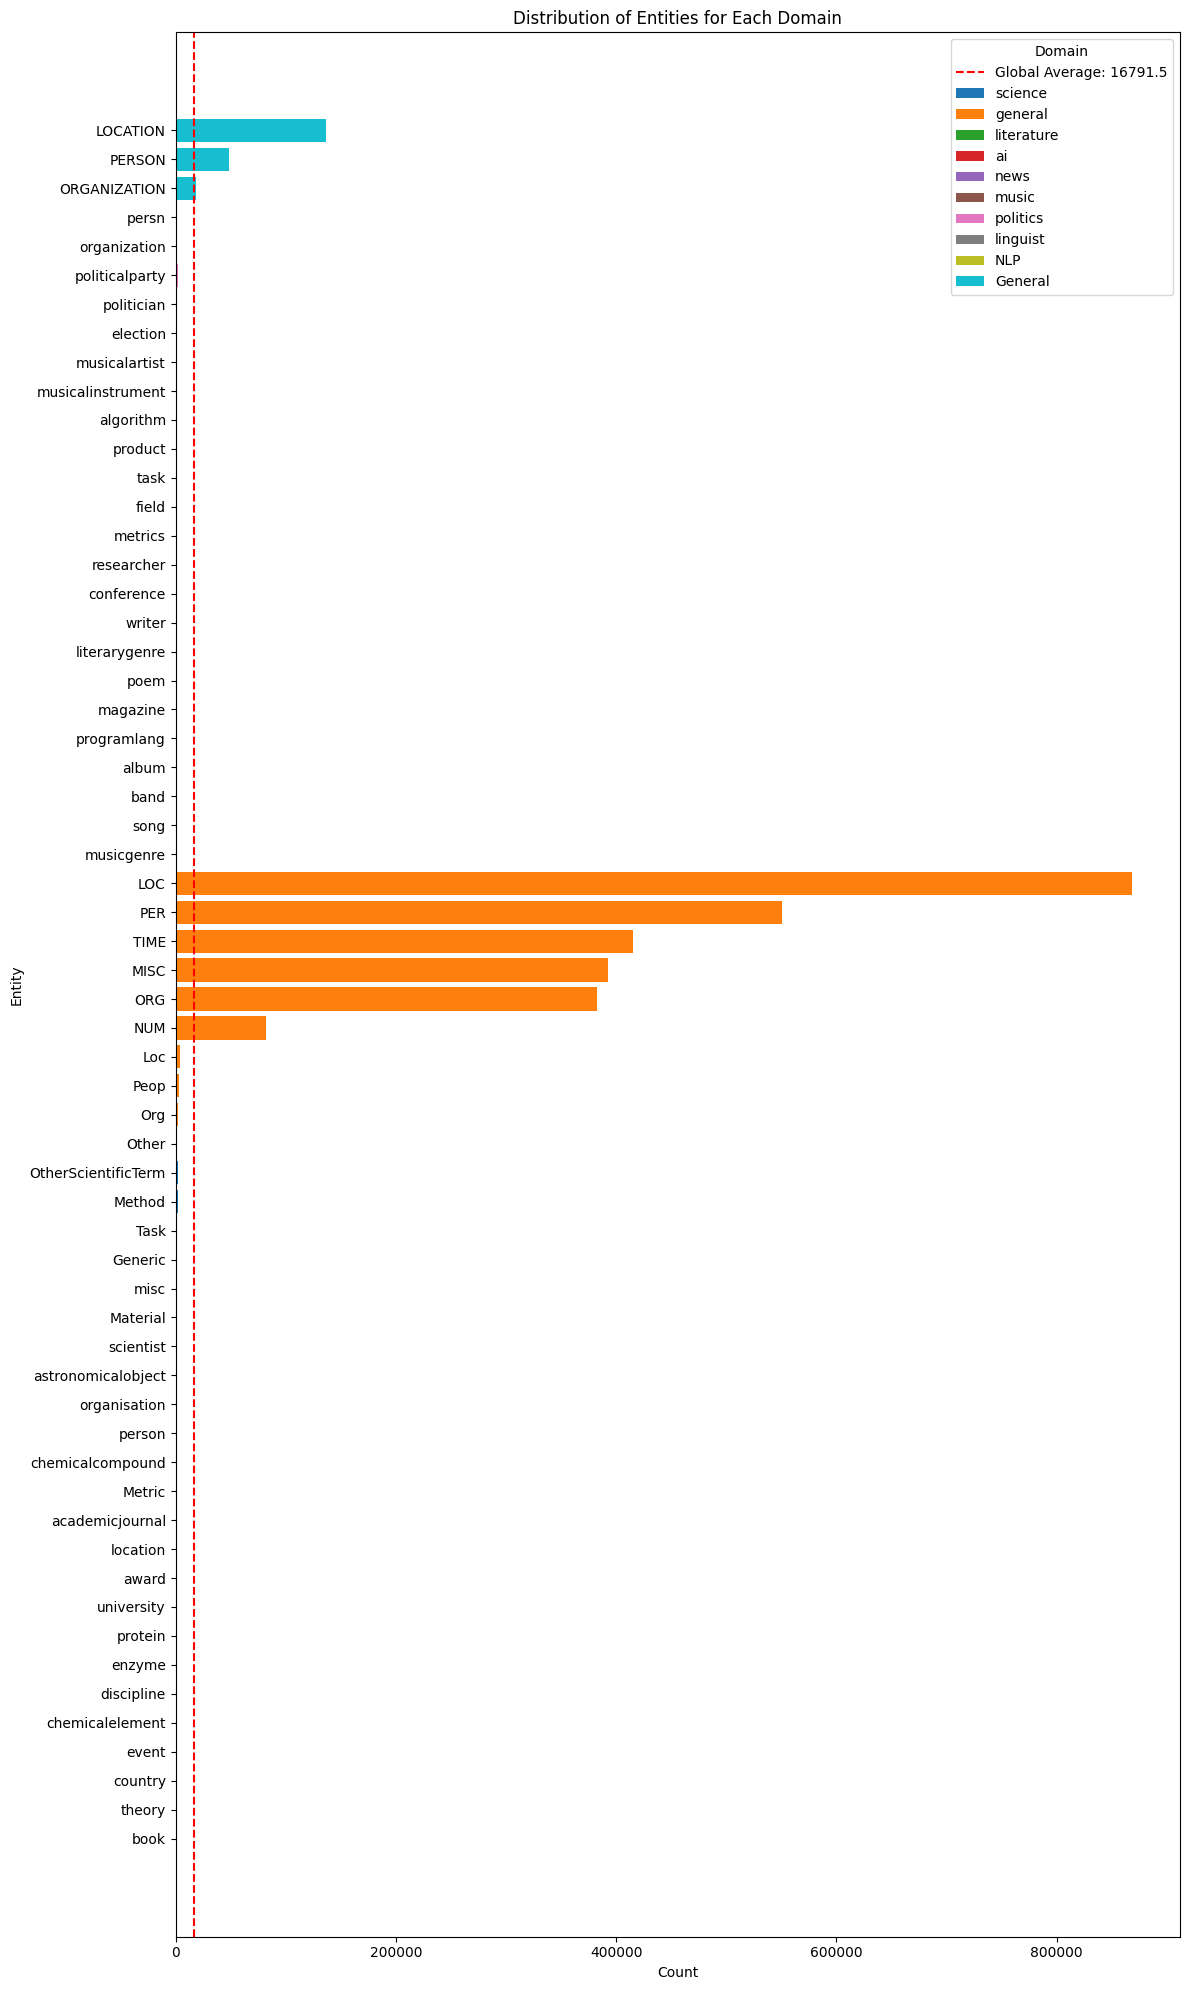

In [6]:

# Assuming df is already loaded with the necessary data

# Extracting and counting entities and relations per domain
domain_entities = {}
domain_relations = {}

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing data'):
    domain = row['domains'].split('-')[0]
    if domain not in domain_entities:
        domain_entities[domain] = []
    if domain not in domain_relations:
        domain_relations[domain] = []

    for ver in row['vertexSet']:
        for v in ver:
            domain_entities[domain].append(v['type'])
    for rel in row['labels']:
        domain_relations[domain].append(rel['r'])

# Creating DataFrames for plotting
entity_df_list = []
relation_df_list = []

for domain, entities in domain_entities.items():
    entity_counts = Counter(entities)
    for entity, count in entity_counts.items():
        entity_df_list.append({'Domain': domain, 'Entity': entity, 'Count': count})

for domain, relations in domain_relations.items():
    relation_counts = Counter(relations)
    for relation, count in relation_counts.items():
        relation_df_list.append({'Domain': domain, 'Relation': relation, 'Count': count})

entity_df = pd.DataFrame(entity_df_list)
relation_df = pd.DataFrame(relation_df_list)

# Calculating global averages
global_avg_entities = entity_df['Count'].mean()
global_avg_relations = relation_df['Count'].mean()

# Plotting the distribution of relations for each domain
plt.figure(figsize=(12, 20))
for domain in relation_df['Domain'].unique():
    subset = relation_df[relation_df['Domain'] == domain]
    subset = subset.sort_values(by='Count', ascending=True)  # Sorting by count in ascending order
    plt.barh(subset['Relation'], subset['Count'], label=domain)

plt.axvline(x=global_avg_relations, color='r', linestyle='--', label=f'Global Average: {global_avg_relations:.1f}')

plt.xlabel('Count')
plt.ylabel('Relation')
plt.title('Distribution of Relations for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

# Plotting the distribution of entities for each domain
plt.figure(figsize=(12, 20))
for domain in entity_df['Domain'].unique():
    subset = entity_df[entity_df['Domain'] == domain]
    subset = subset.sort_values(by='Count', ascending=True)  # Sorting by count in ascending order
    plt.barh(subset['Entity'], subset['Count'], label=domain)

plt.axvline(x=global_avg_entities, color='r', linestyle='--', label=f'Global Average: {global_avg_entities:.1f}')

plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Entities for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

**Logarithmic plot**

Processing data: 100%|██████████| 181623/181623 [00:04<00:00, 39513.01it/s]


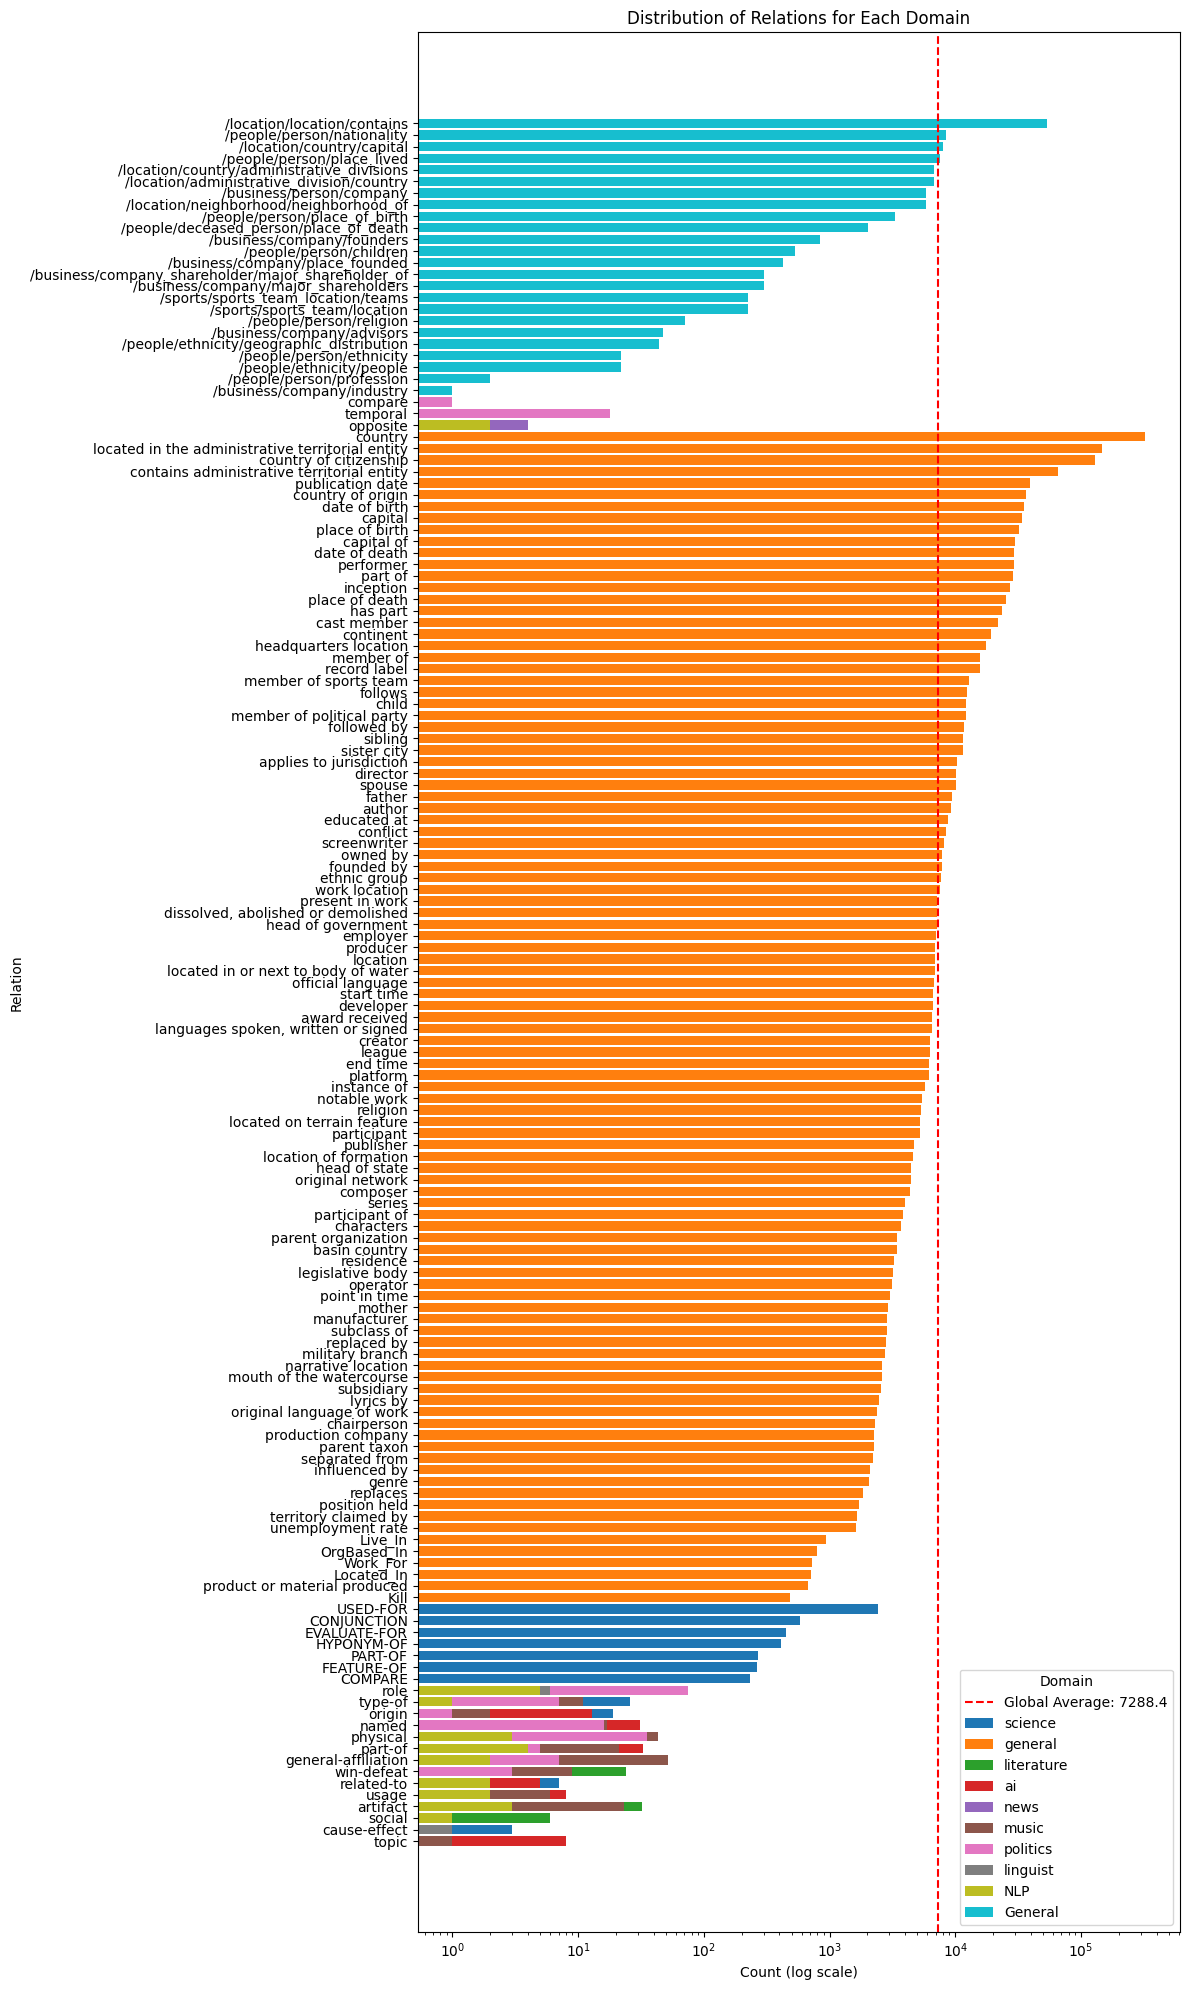

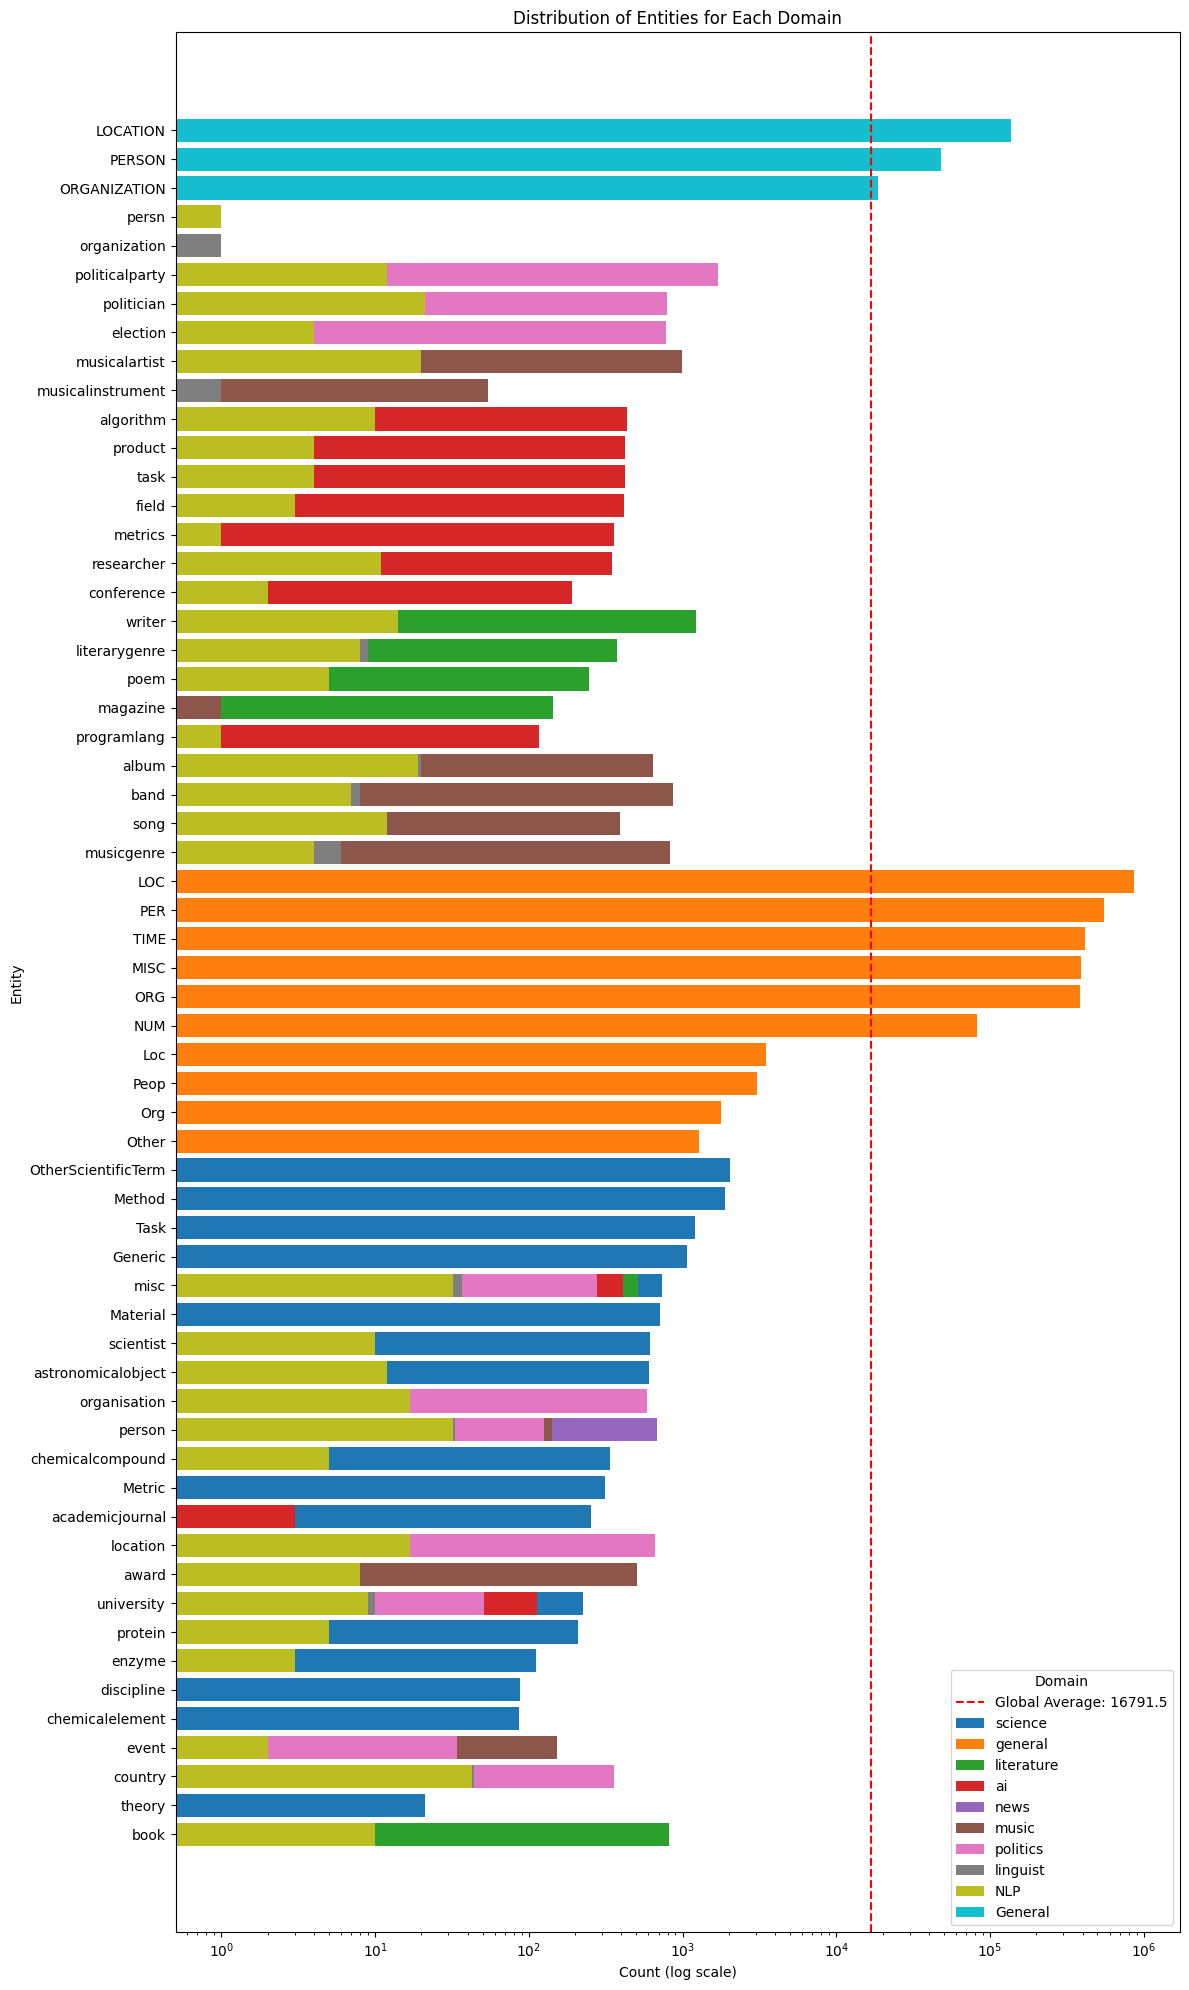

In [7]:

# Extracting and counting entities and relations per domain
domain_entities = {}
domain_relations = {}

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing data'):
    domain = row['domains'].split('-')[0]
    if domain not in domain_entities:
        domain_entities[domain] = []
    if domain not in domain_relations:
        domain_relations[domain] = []

    for ver in row['vertexSet']:
        for v in ver:
            domain_entities[domain].append(v['type'])
    for rel in row['labels']:
        domain_relations[domain].append(rel['r'])

# Creating DataFrames for plotting
entity_df_list = []
relation_df_list = []

for domain, entities in domain_entities.items():
    entity_counts = Counter(entities)
    for entity, count in entity_counts.items():
        entity_df_list.append({'Domain': domain, 'Entity': entity, 'Count': count})

for domain, relations in domain_relations.items():
    relation_counts = Counter(relations)
    for relation, count in relation_counts.items():
        relation_df_list.append({'Domain': domain, 'Relation': relation, 'Count': count})

entity_df = pd.DataFrame(entity_df_list)
relation_df = pd.DataFrame(relation_df_list)

# Calculating global averages
global_avg_entities = entity_df['Count'].mean()
global_avg_relations = relation_df['Count'].mean()

# Plotting the distribution of relations for each domain
plt.figure(figsize=(12, 20))
for domain in relation_df['Domain'].unique():
    subset = relation_df[relation_df['Domain'] == domain]
    subset = subset.sort_values(by='Count', ascending=True)  # Sorting by count in ascending order
    plt.barh(subset['Relation'], subset['Count'], label=domain)

plt.axvline(x=global_avg_relations, color='r', linestyle='--', label=f'Global Average: {global_avg_relations:.1f}')
plt.xscale('log')  # Using a logarithmic scale for the x-axis

plt.xlabel('Count (log scale)')
plt.ylabel('Relation')
plt.title('Distribution of Relations for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

# Plotting the distribution of entities for each domain
plt.figure(figsize=(12, 20))
for domain in entity_df['Domain'].unique():
    subset = entity_df[entity_df['Domain'] == domain]
    subset = subset.sort_values(by='Count', ascending=True)  # Sorting by count in ascending order
    plt.barh(subset['Entity'], subset['Count'], label=domain)

plt.axvline(x=global_avg_entities, color='r', linestyle='--', label=f'Global Average: {global_avg_entities:.1f}')
plt.xscale('log')  # Using a logarithmic scale for the x-axis

plt.xlabel('Count (log scale)')
plt.ylabel('Entity')
plt.title('Distribution of Entities for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

**Check relations**

In [8]:
# Extract all unique relations
relations = set(rel['r'] for labels in df['labels'] for rel in labels)

# Generate samples for all relations
samples = {}
for relation in relations:
    relation_rows = df[df.apply(lambda row: any(rel['r'] == relation for rel in row['labels']), axis=1)]
    samples[relation] = relation_rows.head(2)

# Display samples
for relation, sample in samples.items():
    print(f"Samples for relation: {relation}")
    for idx, row in sample.iterrows():
        print("Sents:", row['sents'])
        print("VertexSet:", row['vertexSet'])
        print("Labels:", row['labels'])
        print()
    print("\n")

Samples for relation: USED-FOR
Sents: [['Recognition', 'of', 'proper', 'nouns', 'in', 'Japanese', 'text', 'has', 'been', 'studied', 'as', 'a', 'part', 'of', 'the', 'more', 'general', 'problem', 'of', 'morphological', 'analysis', 'in', 'Japanese', 'text', 'processing', '-LRB-', '-LSB-', '1', '-RSB-', '-LSB-', '2', '-RSB-', '-RRB-', '.'], ['It', 'has', 'also', 'been', 'studied', 'in', 'the', 'framework', 'of', 'Japanese', 'information', 'extraction', '-LRB-', '-LSB-', '3', '-RSB-', '-RRB-', 'in', 'recent', 'years', '.'], ['Our', 'approach', 'to', 'the', 'Multi-lingual', 'Evaluation', 'Task', '-LRB-', 'MET', '-RRB-', 'for', 'Japanese', 'text', 'is', 'to', 'consider', 'the', 'given', 'task', 'as', 'a', 'morphological', 'analysis', 'problem', 'in', 'Japanese', '.'], ['Our', 'morphological', 'analyzer', 'has', 'done', 'all', 'the', 'necessary', 'work', 'for', 'the', 'recognition', 'and', 'classification', 'of', 'proper', 'names', ',', 'numerical', 'and', 'temporal', 'expressions', ',', 'i.e.

Using comined from previous datasets -- assumed OK. 



## Reduced format


In [9]:
combined = Path(data_dir, "pre-processed data","combined_dataset_corrected.json")
df = pd.read_json(combined, orient="records", lines=False)

In [10]:
df

org_dataset                    title  domains  \
0           SciERC                 X96-1059  science   
1           SciERC         ICCV_2001_47_abs  science   
2           SciERC  INTERSPEECH_2013_21_abs  science   
3           SciERC                 H01-1049  science   
4           SciERC                 C96-1062  science   
...            ...                      ...      ...   
181604      DocRED        The Funk Brothers  general   
181605      DocRED            Kaitlyn Lawes  general   
181606      DocRED           Adeline Miller  general   
181607      DocRED      Cookeolus japonicus  general   
181608      DocRED                ABBA Live  general   

                                                    sents  \
0       [[Recognition, of, proper, nouns, in, Japanese...   
1       [[We, propose, to, incorporate, a, priori, geo...   
2       [[This, work, proposes, a, new, research, dire...   
3       [[Listen-Communicate-Show, -LRB-, LCS, -RRB-, ...   
4       [[A, domain, independent, model, is, proposed,...   
...                                                   ...   
181604  [[The, Funk, Brothers, were, a, group, of, Det...   
181605  [[Leslie, Kaitlyn, Lawes, (, born, December, 1...   
181606  [[Adeline, Miller, ,, alias, Adeline, Furman, ...   
181607  [[Cookeolus, japonicus, is, a, species, of, fi...   
181608  [[ABBA, Live, is, an, album, of, live, recordi...   

                                                vertexSet  \
0       [[{'name': 'Recognition of proper nouns', 'pos...   
1       [[{'name': 'priori geometric constraints', 'po...   
2       [[{'name': 'weakly supervised dependency parse...   
3       [[{'name': 'Listen-Communicate-Show -LRB- LCS ...   
4       [[{'name': 'domain independent model', 'pos': ...   
...                                                   ...   
181604  [[{'name': 'Funk Brother', 'pos': [32, 34], 's...   
181605  [[{'type': 'Person', 'pos': [0, 3], 'name': 'L...   
181606  [[{'name': 'Adeline Miller', 'pos': [0, 2], 's...   
181607  [[{'name': 'Mozambican Portuguese', 'pos': [61...   
181608  [[{'name': 'ABBA Live', 'pos': [4, 6], 'sent_i...   

                                                   labels  \
0       [{'r': 'Part of', 'h': 0, 't': 1, 'evidence': ...   
1       [{'r': 'Part of', 'h': 0, 't': 1, 'evidence': ...   
2       [{'r': 'Used for', 'h': 0, 't': 1, 'evidence':...   
3       [{'r': 'Used for', 'h': 0, 't': 1, 'evidence':...   
4       [{'r': 'Used for', 'h': 0, 't': 1, 'evidence':...   
...                                                   ...   
181604                                                 []   
181605                                                 []   
181606                                                 []   
181607                                                 []   
181608                                                 []   

                                       original_file_path  
0       /work3/s174159/LLM_Thesis/data/raw_data/SciERC...  
1       /work3/s174159/LLM_Thesis/data/raw_data/SciERC...  
2       /work3/s174159/LLM_Thesis/data/raw_data/SciERC...  
3       /work3/s174159/LLM_Thesis/data/raw_data/SciERC...  
4       /work3/s174159/LLM_Thesis/data/raw_data/SciERC...  
...                                                   ...  
181604  /work3/s174159/LLM_Thesis/data/raw_data/DocRED...  
181605  /work3/s174159/LLM_Thesis/data/raw_data/DocRED...  
181606  /work3/s174159/LLM_Thesis/data/raw_data/DocRED...  
181607  /work3/s174159/LLM_Thesis/data/raw_data/DocRED...  
181608  /work3/s174159/LLM_Thesis/data/raw_data/DocRED...  

[181609 rows x 7 columns]

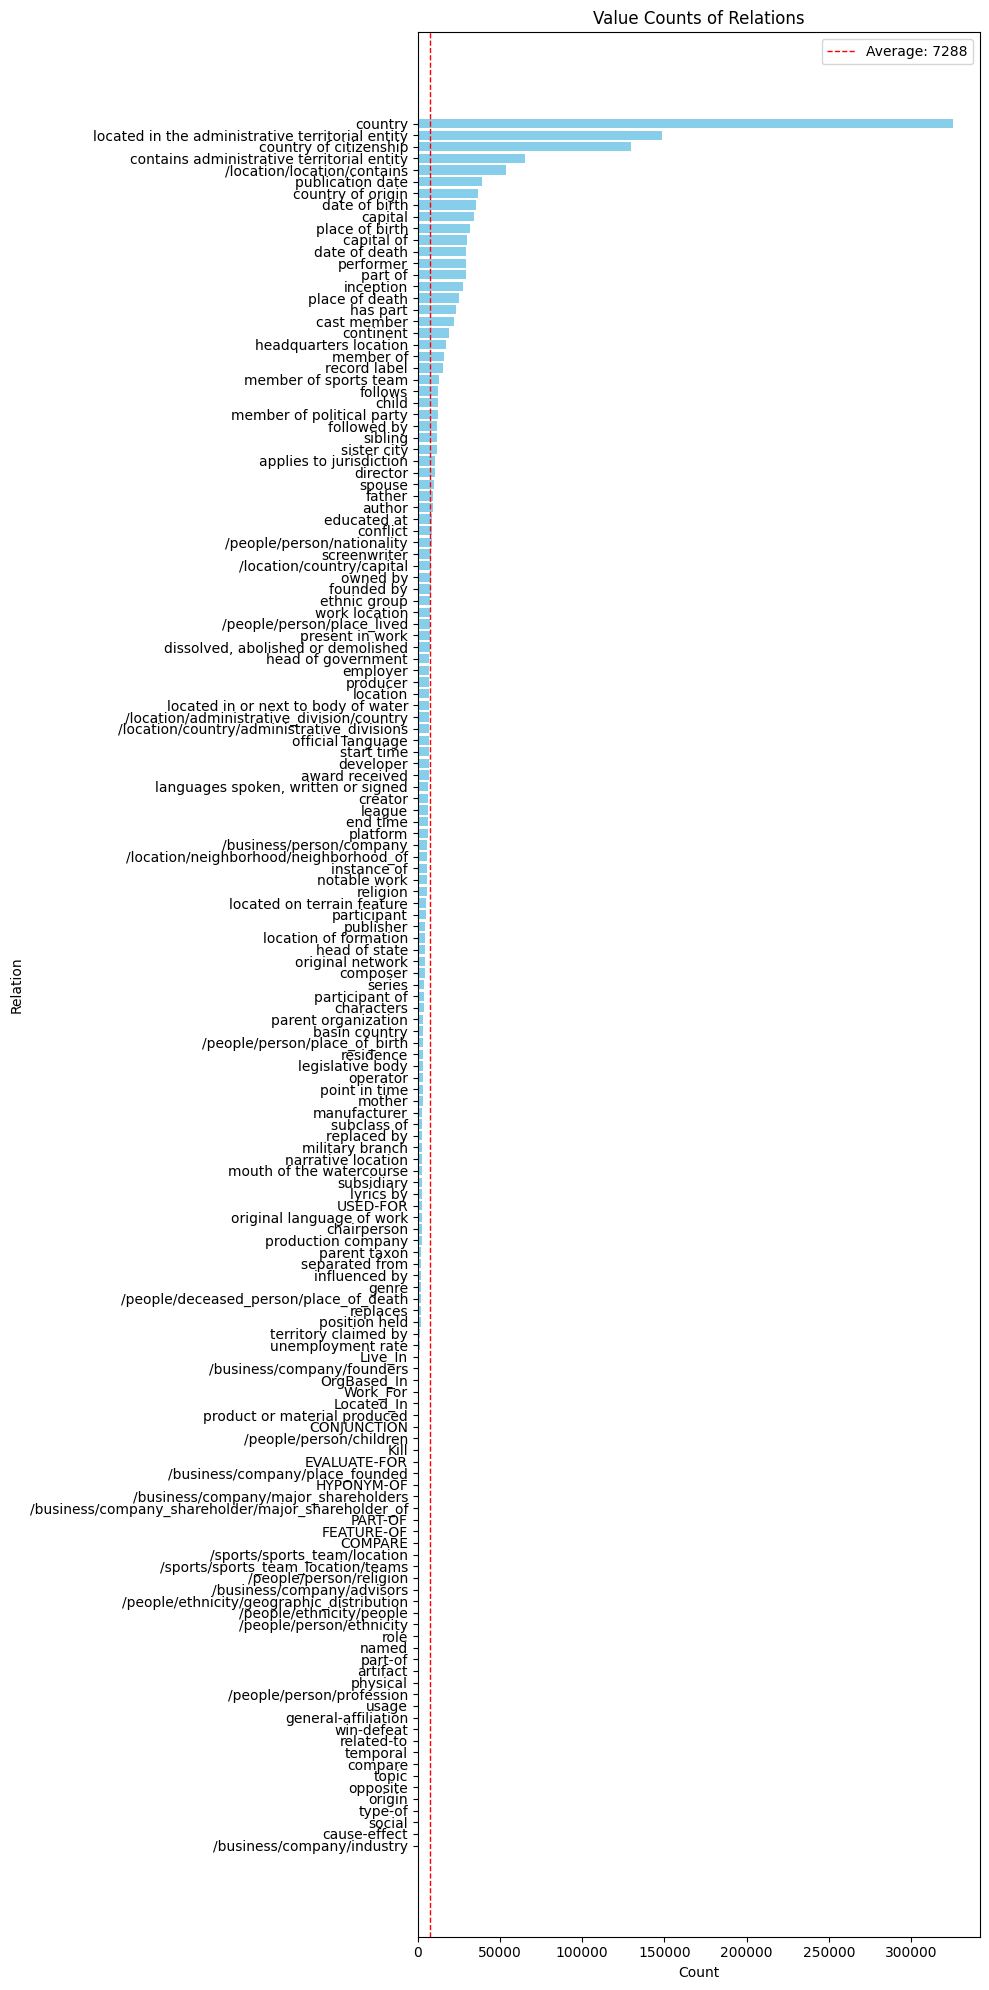

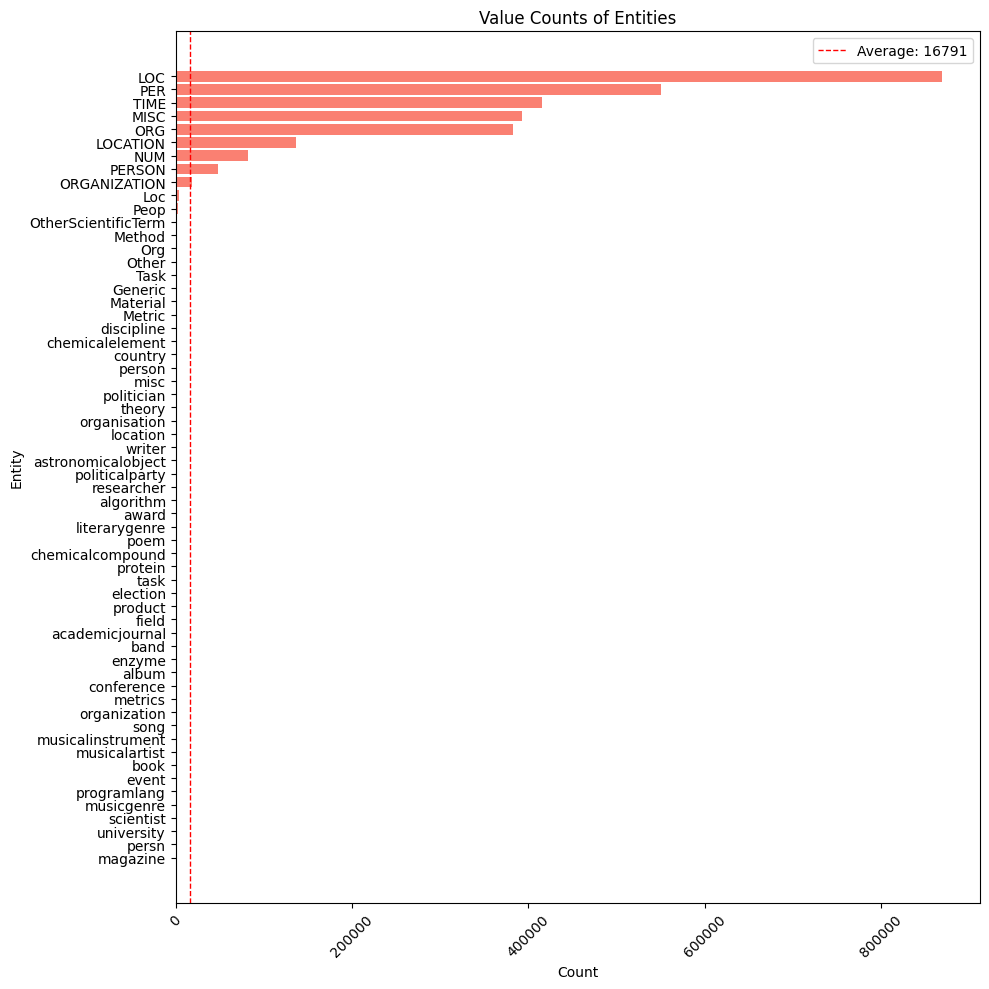

In [11]:
# Plotting the value counts of relations horizontally
relation_df = relation_df.sort_values(by='Count', ascending=True)
average_relation_count = relation_df['Count'].mean()

plt.figure(figsize=(10, 20))
plt.barh(relation_df['Relation'], relation_df['Count'], color='skyblue')
plt.axvline(average_relation_count, color='red', linestyle='--', linewidth=1, label=f'Average: {average_relation_count:.0f}')
plt.xlabel('Count')
plt.ylabel('Relation')
plt.title('Value Counts of Relations')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the value counts of entities
entity_df = entity_df.sort_values(by='Count', ascending=True)
average_entity_count = entity_df['Count'].mean()

plt.figure(figsize=(10, 10))
plt.barh(entity_df['Entity'], entity_df['Count'], color='salmon')
plt.axvline(average_entity_count, color='red', linestyle='--', linewidth=1, label=f'Average: {average_entity_count:.0f}')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Value Counts of Entities')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Processing data: 100%|██████████| 181609/181609 [00:12<00:00, 14101.46it/s]


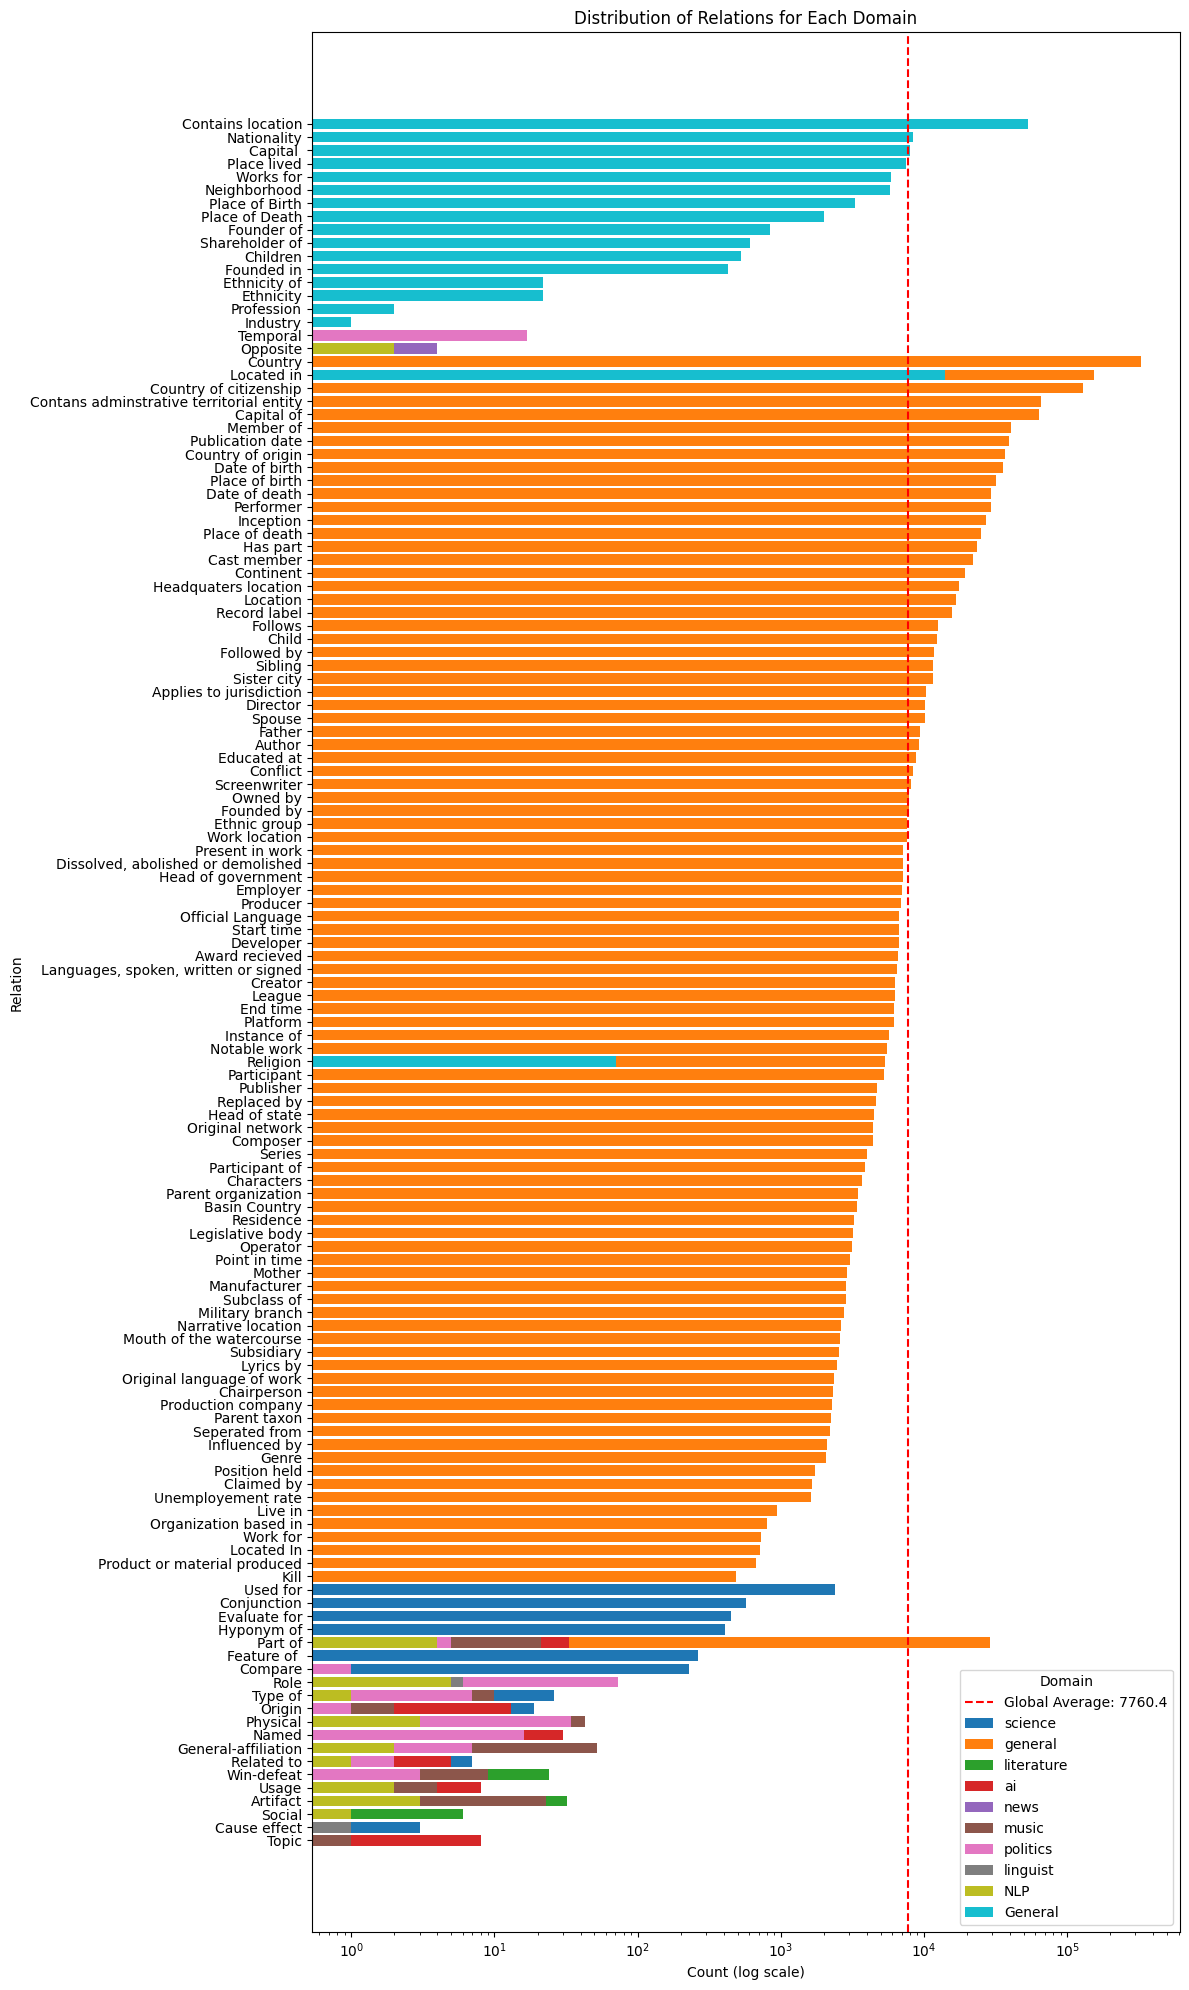

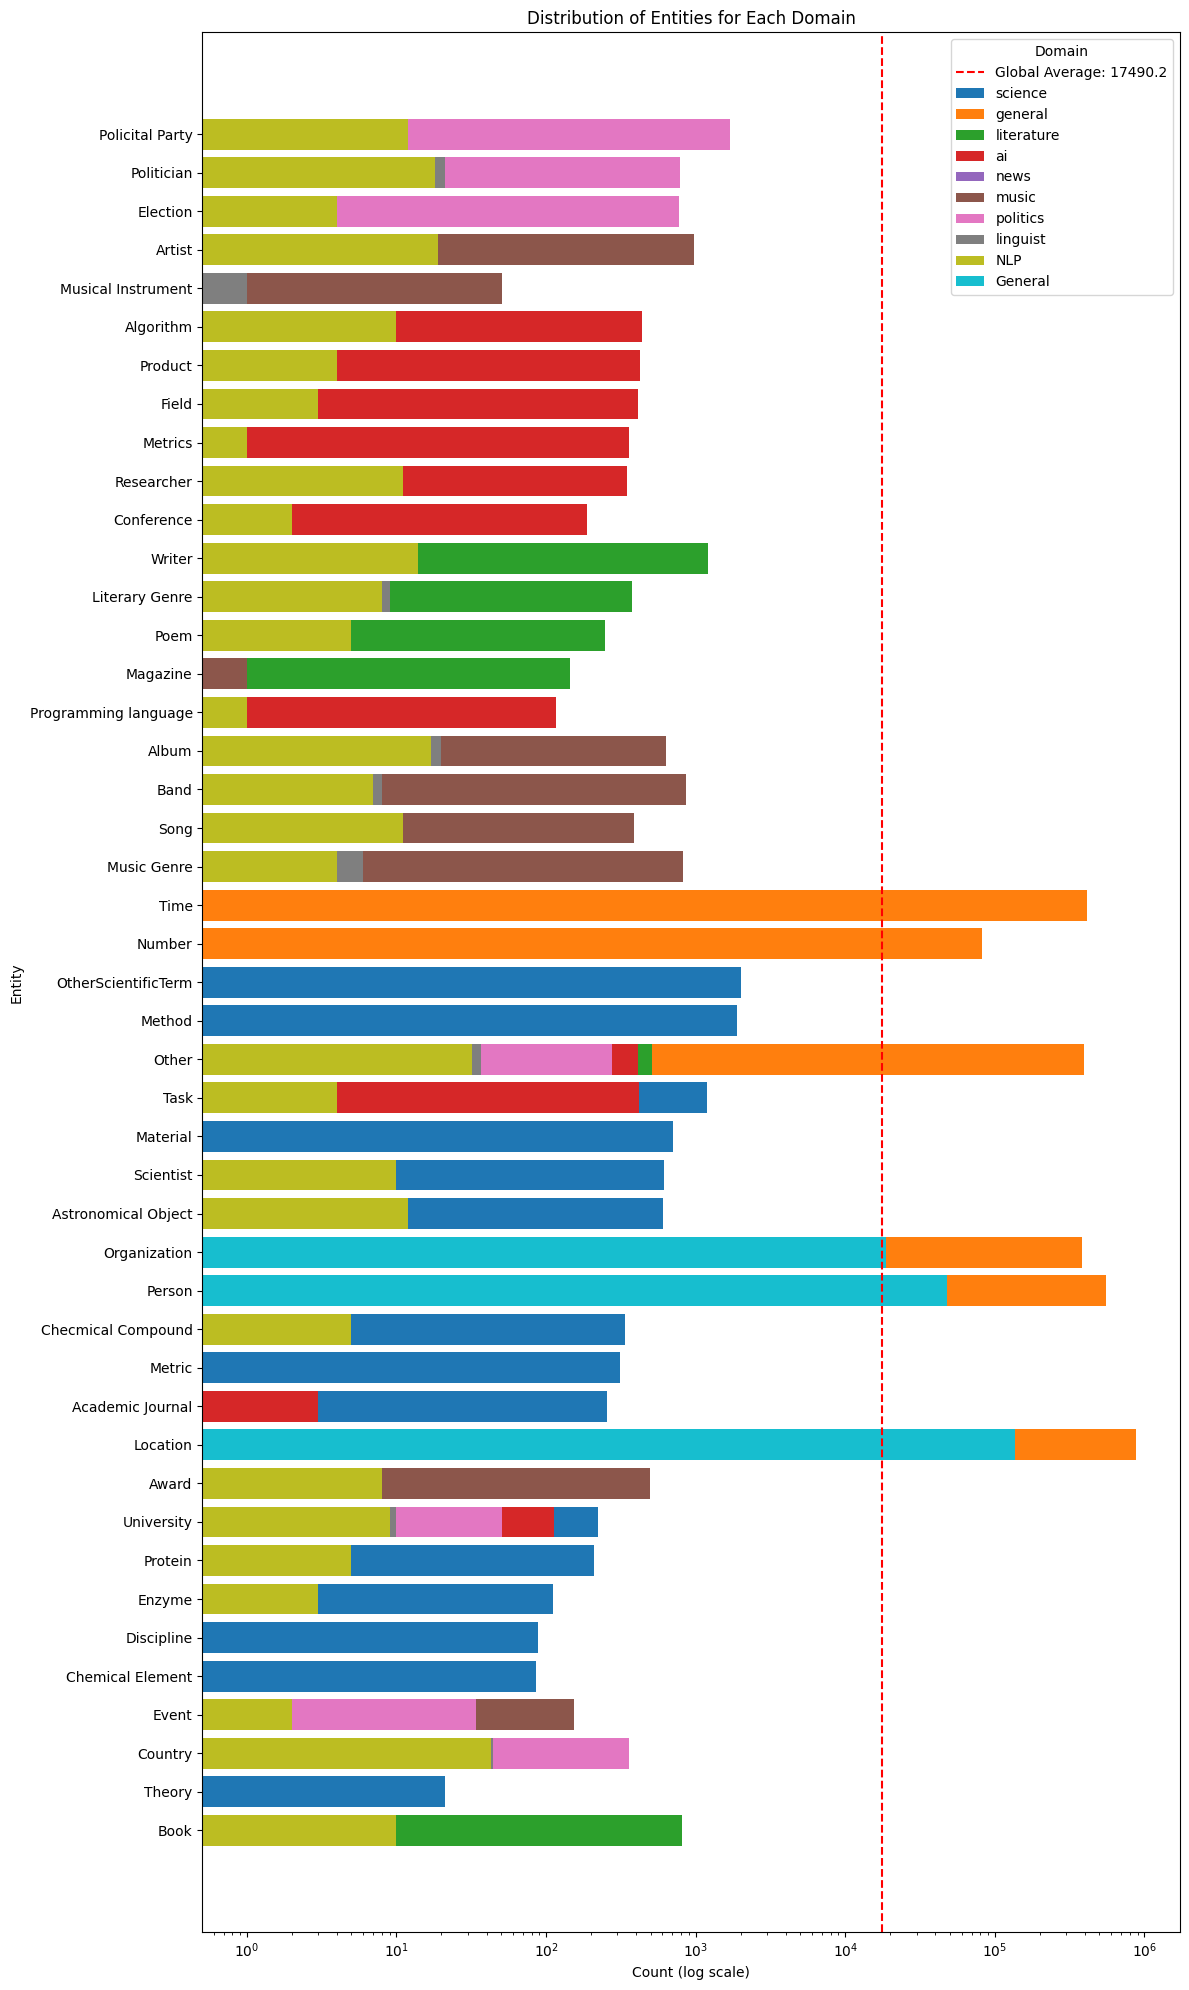

In [12]:

# Extracting and counting entities and relations per domain
domain_entities = {}
domain_relations = {}

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing data'):
    domain = row['domains'].split('-')[0]
    if domain not in domain_entities:
        domain_entities[domain] = []
    if domain not in domain_relations:
        domain_relations[domain] = []

    for ver in row['vertexSet']:
        for v in ver:
            domain_entities[domain].append(v['type'])
    for rel in row['labels']:
        domain_relations[domain].append(rel['r'])

# Creating DataFrames for plotting
entity_df_list = []
relation_df_list = []

for domain, entities in domain_entities.items():
    entity_counts = Counter(entities)
    for entity, count in entity_counts.items():
        entity_df_list.append({'Domain': domain, 'Entity': entity, 'Count': count})

for domain, relations in domain_relations.items():
    relation_counts = Counter(relations)
    for relation, count in relation_counts.items():
        relation_df_list.append({'Domain': domain, 'Relation': relation, 'Count': count})

entity_df = pd.DataFrame(entity_df_list)
relation_df = pd.DataFrame(relation_df_list)

# Calculating global averages
global_avg_entities = entity_df['Count'].mean()
global_avg_relations = relation_df['Count'].mean()

# Plotting the distribution of relations for each domain
plt.figure(figsize=(12, 20))
for domain in relation_df['Domain'].unique():
    subset = relation_df[relation_df['Domain'] == domain]
    subset = subset.sort_values(by='Count', ascending=True)  # Sorting by count in ascending order
    plt.barh(subset['Relation'], subset['Count'], label=domain)

plt.axvline(x=global_avg_relations, color='r', linestyle='--', label=f'Global Average: {global_avg_relations:.1f}')
plt.xscale('log')  # Using a logarithmic scale for the x-axis

plt.xlabel('Count (log scale)')
plt.ylabel('Relation')
plt.title('Distribution of Relations for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

# Plotting the distribution of entities for each domain
plt.figure(figsize=(12, 20))
for domain in entity_df['Domain'].unique():
    subset = entity_df[entity_df['Domain'] == domain]
    subset = subset.sort_values(by='Count', ascending=True)  # Sorting by count in ascending order
    plt.barh(subset['Entity'], subset['Count'], label=domain)

plt.axvline(x=global_avg_entities, color='r', linestyle='--', label=f'Global Average: {global_avg_entities:.1f}')
plt.xscale('log')  # Using a logarithmic scale for the x-axis

plt.xlabel('Count (log scale)')
plt.ylabel('Entity')
plt.title('Distribution of Entities for Each Domain')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

## Split and compare distributions

In [13]:
test = pd.read_json("/Users/peetz/Documents/GitHub/LLM_Thesis/data/data_finalized/test.json", orient="records", lines=False)
dev = pd.read_json("/Users/peetz/Documents/GitHub/LLM_Thesis/data/data_finalized/dev.json", orient="records", lines=False)
train = pd.read_json("/Users/peetz/Documents/GitHub/LLM_Thesis/data/data_finalized/train.json", orient="records", lines=False)
distant = pd.read_json("/Users/peetz/Documents/GitHub/LLM_Thesis/data/data_finalized/train_distant.json", orient="records", lines=False)

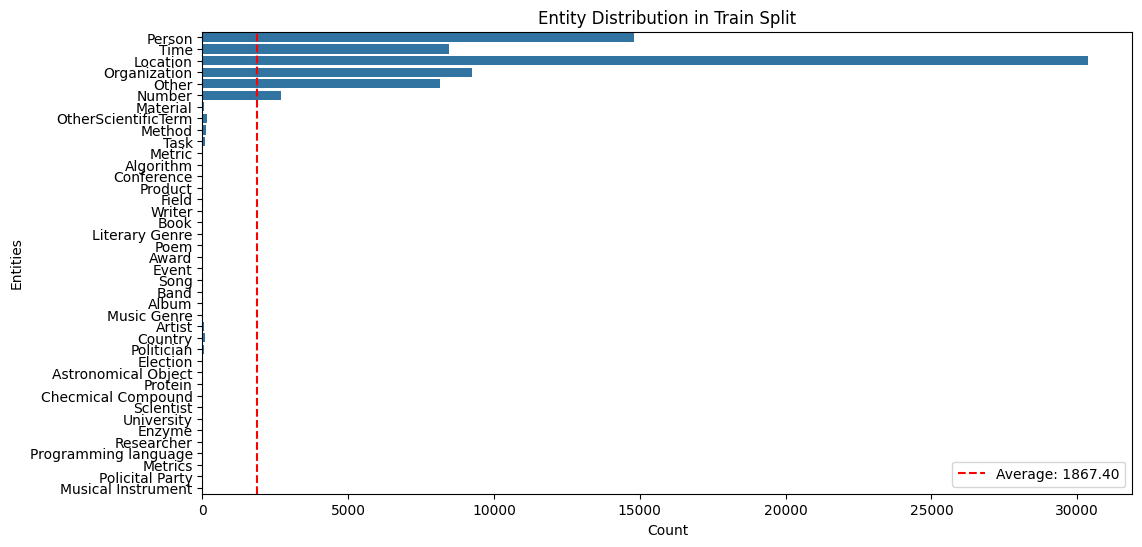

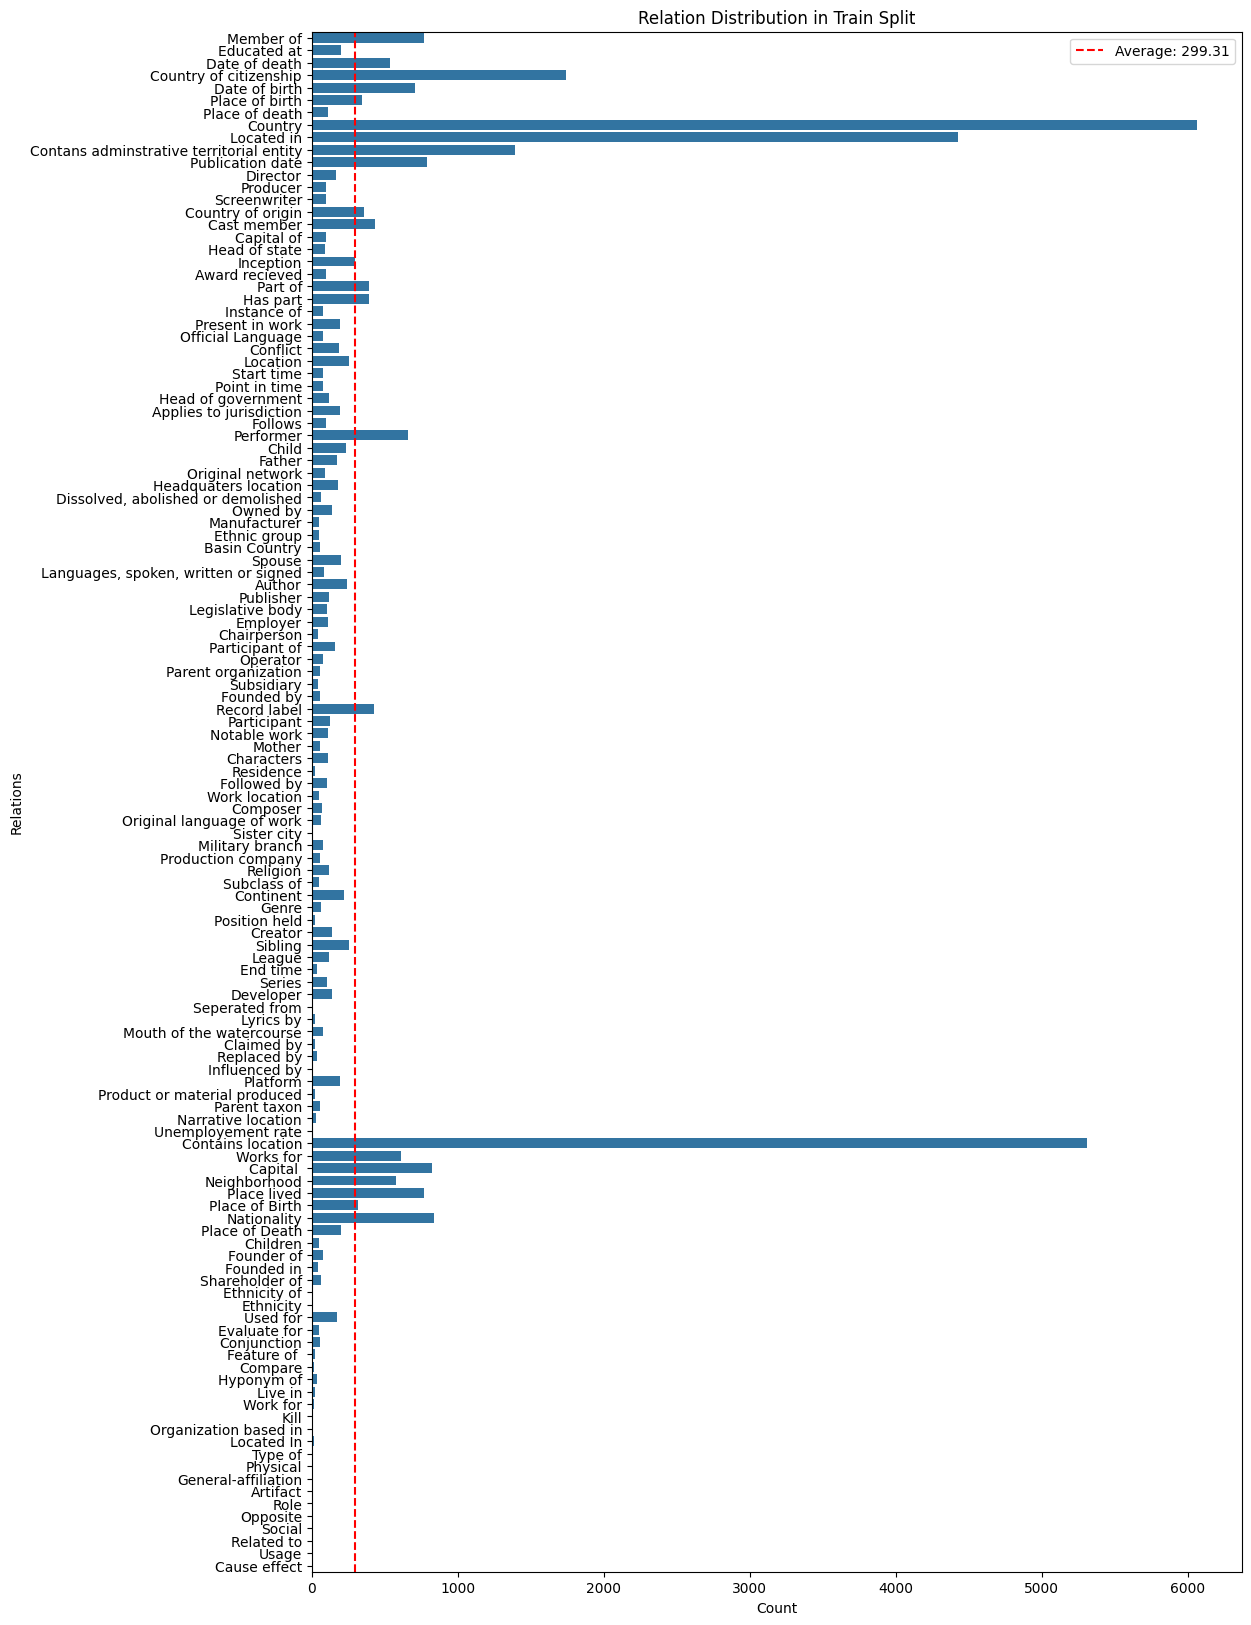

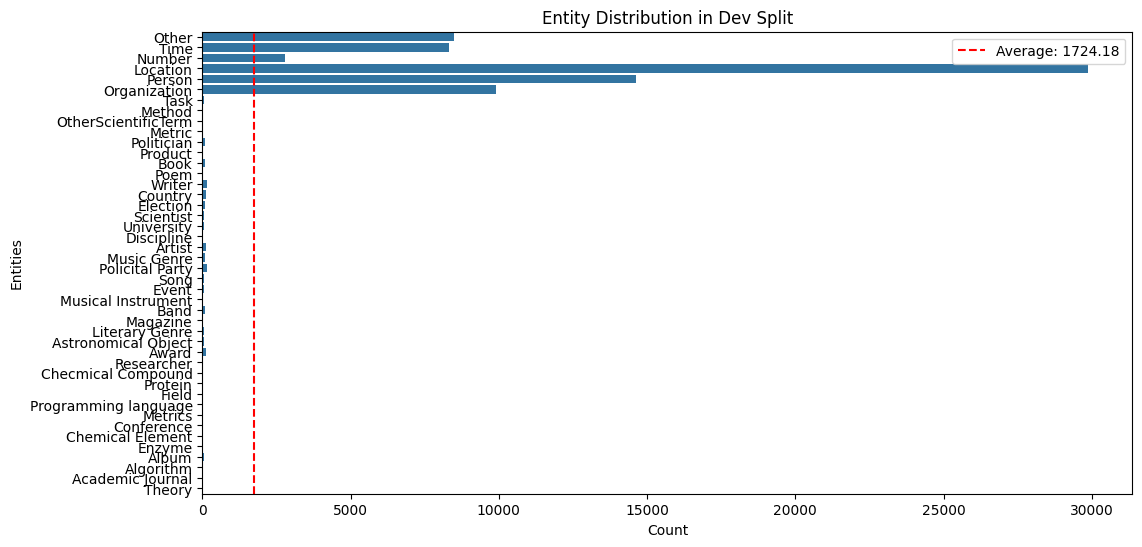

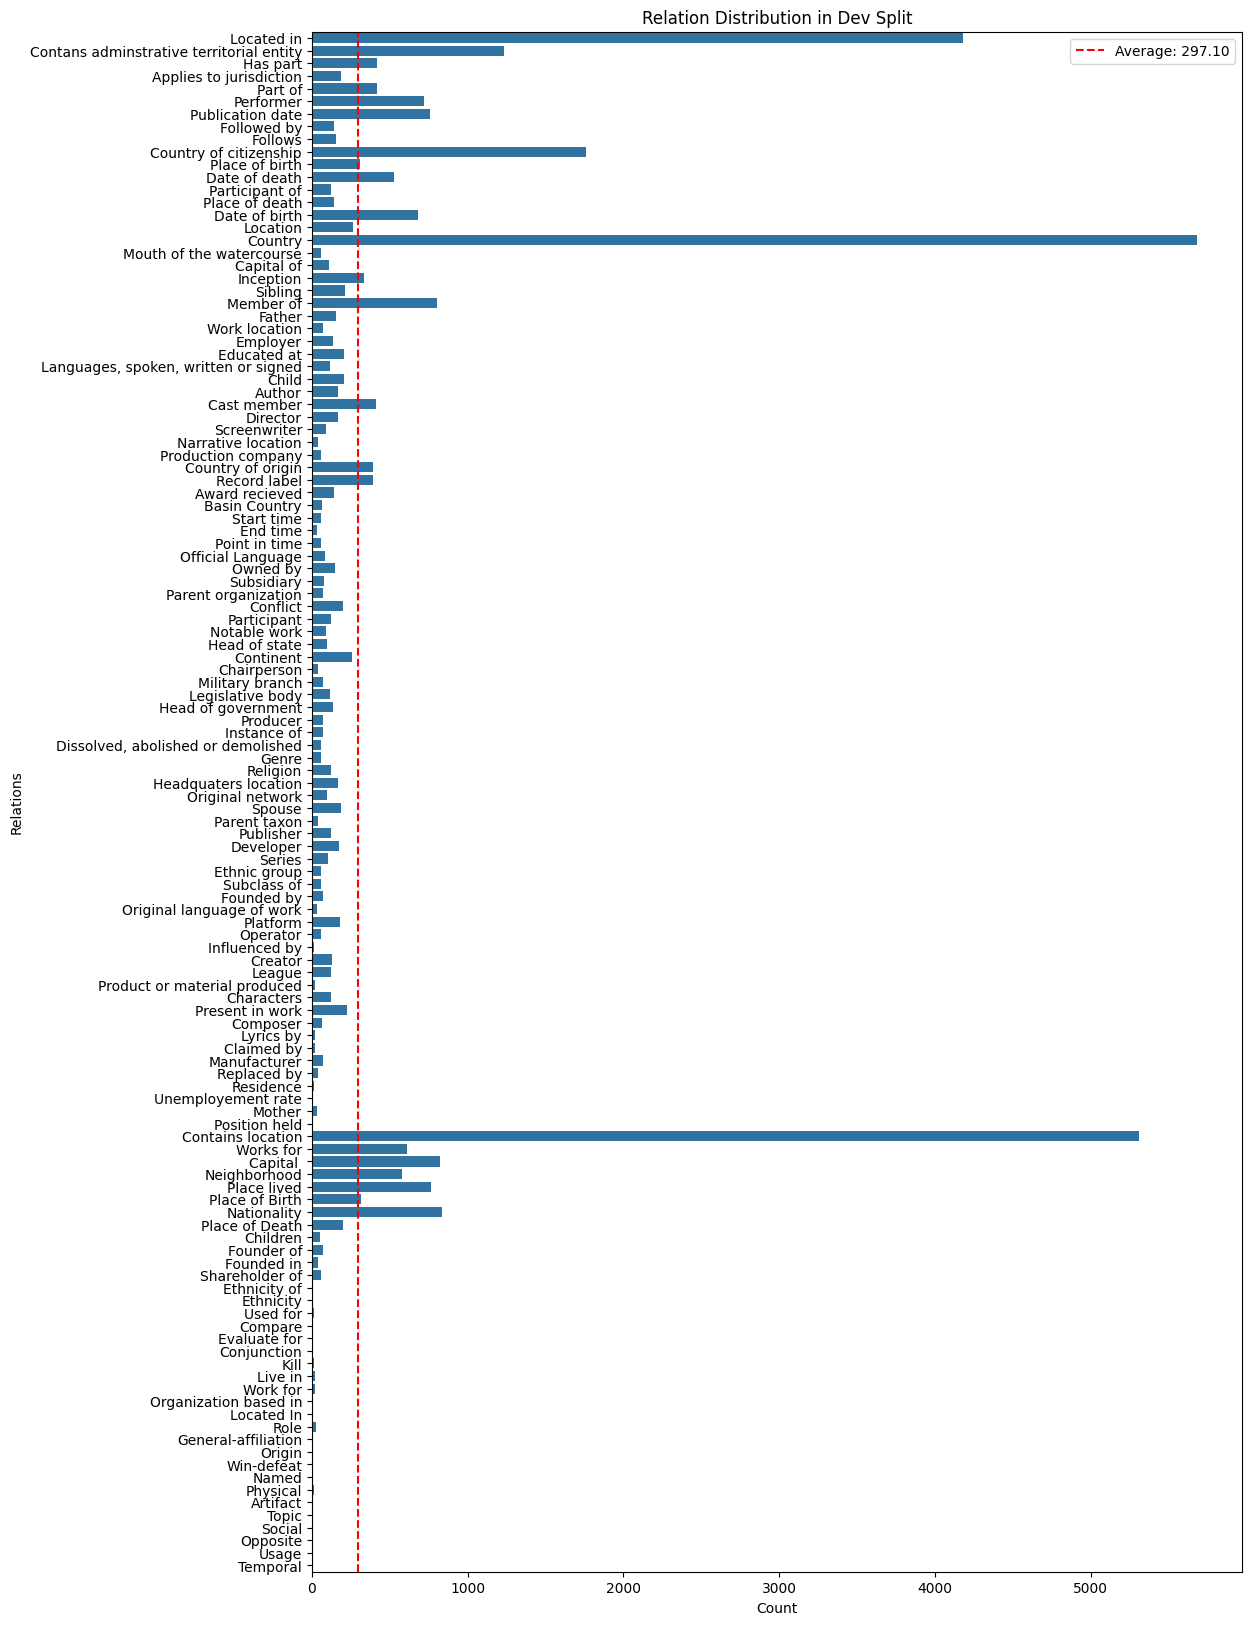

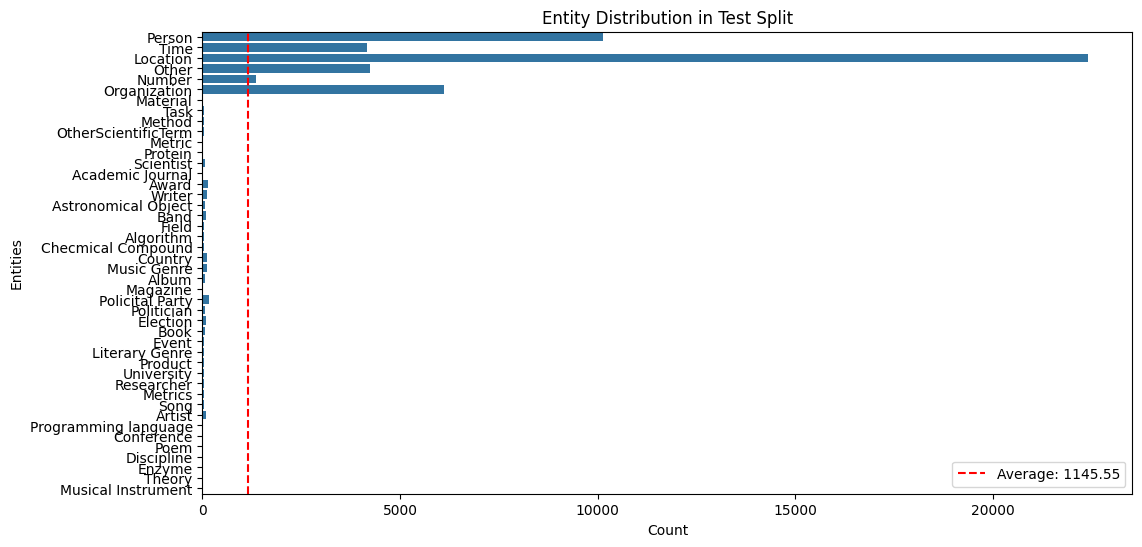

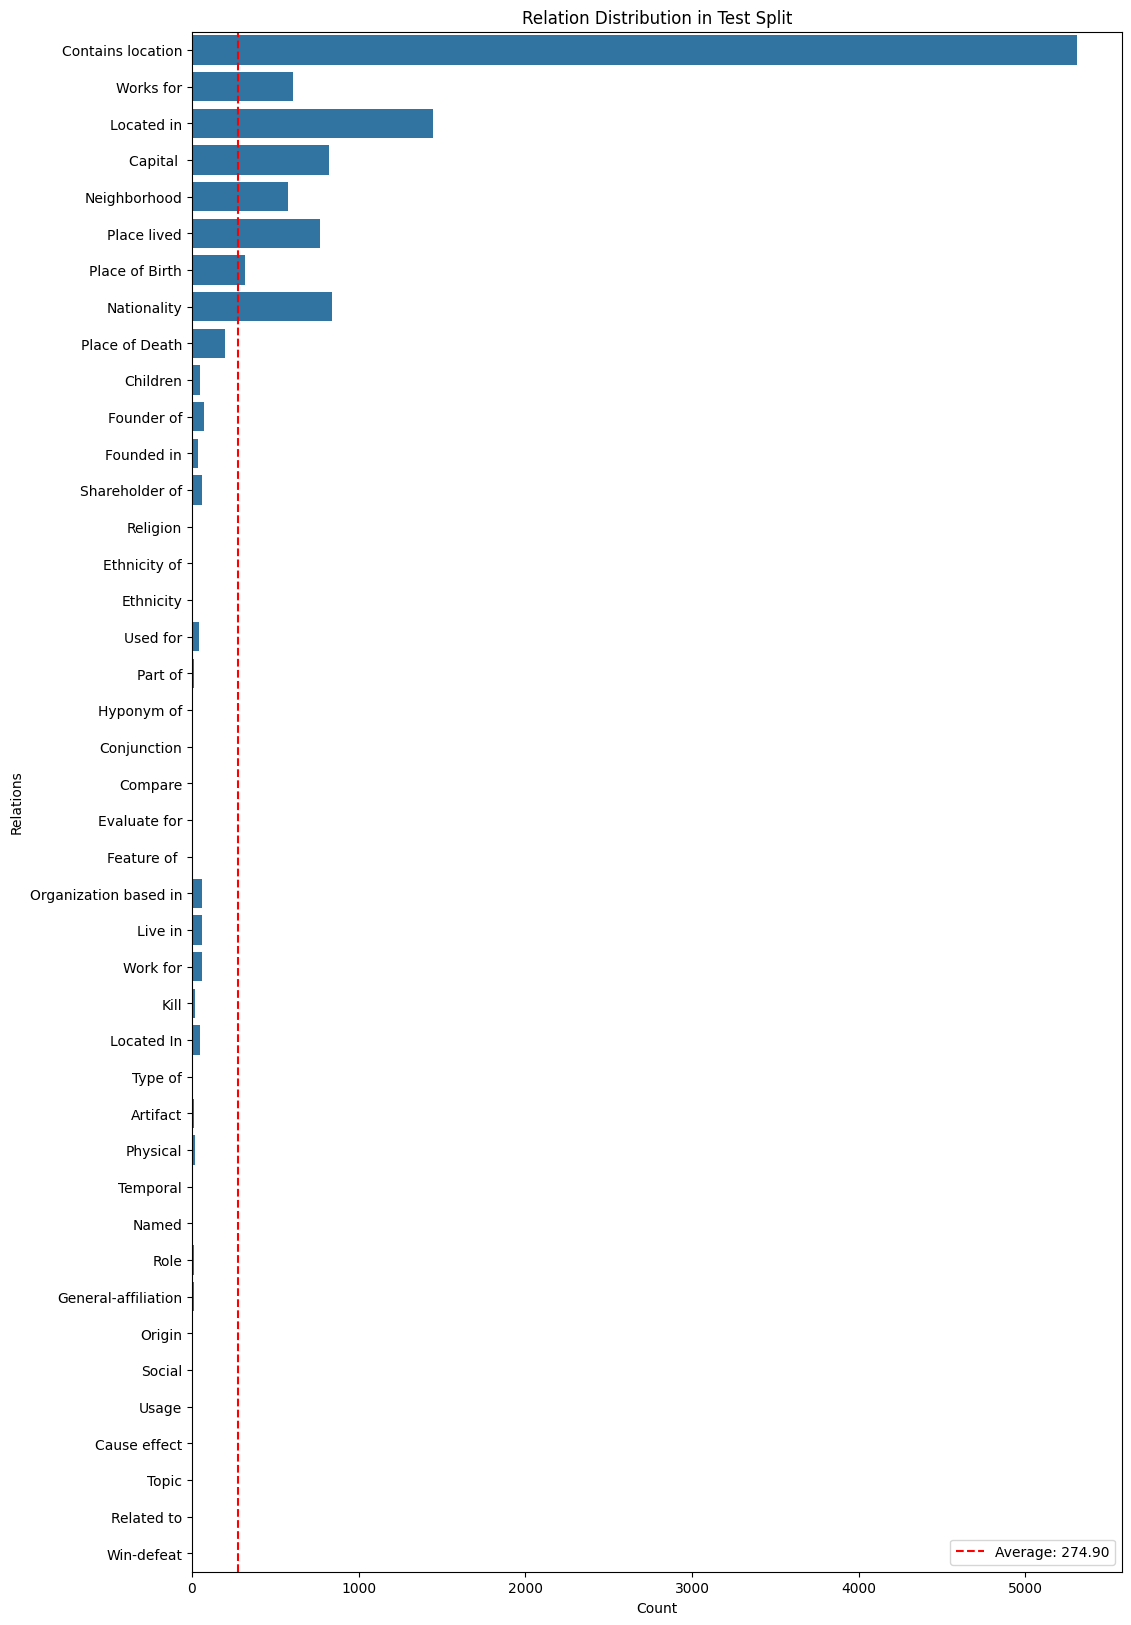

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
import os

# # Adjusted split function
# def get_data_split(df, dataset_name=None, output_dir=None, gen_new_distant=True, output=True):
#     if "dataset" not in df.columns and dataset_name is None:
#         raise ValueError("DataFrame must contain a 'dataset' column or a 'dataset_name' must be specified.")

#     if dataset_name:  
#         if dataset_name == "DocRED":
#             print(f"Processing {dataset_name} data...")
#             distant = df[df["original_file_path"].str.contains("distant")]
#             un_distant = df[~df["original_file_path"].str.contains("distant")]
#             test = un_distant[un_distant["original_file_path"].str.contains("test")]
#             remainder = un_distant[~un_distant["original_file_path"].str.contains("test")]
#             if not gen_new_distant:
#                 print("Combining distant and non-distant data...")
#                 remainder = pd.concat([distant, remainder])
#             train, dev = train_test_split(remainder, test_size=0.5, random_state=42)
#         elif dataset_name == "NYT":
#             print(f"Processing {dataset_name} data...");
#             if gen_new_distant:
#                 df, distant = train_test_split(df, train_size=0.1, random_state=42)
#             test = df[df["original_file_path"].str.contains("test")]
#             dev = df[df["original_file_path"].str.contains("valid")]
#             train = df[df["original_file_path"].str.contains("train")]
#         elif dataset_name == "sciERC":
#             print(f"Processing {dataset_name} data...");
#             if gen_new_distant:
#                 df, distant = train_test_split(df, train_size=0.1, random_state=42)
#             test = df[df["original_file_path"].str.contains("test")]
#             dev = df[df["original_file_path"].str.contains("dev")]
#             train = df[df["original_file_path"].str.contains("train")]
#         elif dataset_name == "CoNLL04":
#             print(f"Processing {dataset_name} data...");
#             if gen_new_distant:
#                 df, distant = train_test_split(df, train_size=0.1, random_state=42)
#             dev, test = train_test_split(df, test_size=0.66, random_state=42)
#             train, dev = train_test_split(dev, test_size=0.5, random_state=42)
#         elif dataset_name == "CrossRE":
#             print(f"Processing {dataset_name} data...");
#             if gen_new_distant:
#                 gold1 = df[df["original_file_path"].str.contains("NLP")]
#                 gold2 = df[df["original_file_path"].str.contains("linguist")]
#                 train = pd.concat([gold1, gold2])
#                 remainder = df[~df.index.isin(train.index)]
#                 remainder, distant = train_test_split(remainder, test_size=0.8, random_state=42)
#                 dev, test = train_test_split(remainder, test_size=0.5, random_state=42)
#         elif dataset_name == "ALL":
#             print("Combining all datasets...");
#             distant_dfs, test_dfs, dev_dfs, train_dfs = [], [], [], []

#             for dataset in ["DocRED", "NYT", "sciERC", "CoNLL04", "CrossRE"]:
#                 current_df = df[df["org_dataset"] == dataset]
#                 train, dev, test, distant = get_data_split(current_df, dataset_name=dataset, gen_new_distant=gen_new_distant)
#                 distant_dfs.append(distant)
#                 test_dfs.append(test)
#                 dev_dfs.append(dev)
#                 train_dfs.append(train)

#             distant = pd.concat(distant_dfs)
#             test = pd.concat(test_dfs)
#             dev = pd.concat(dev_dfs)
#             train = pd.concat(train_dfs)
#         else:
#             raise ValueError("Unsupported dataset_name provided.")

#     if output_dir is None:
#         output_dir = str(Path(root_dir, "processed_data", dataset_name))
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     if output:
#         train.to_json(Path(output_dir, "train.json"), orient="records", lines=False)
#         dev.to_json(Path(output_dir, "dev.json"), orient="records", lines=False)
#         test.to_json(Path(output_dir, "test.json"), orient="records", lines=False)
#         if gen_new_distant:
#             distant.to_json(Path(output_dir, "train_distant.json"), orient="records", lines=False)
#     if gen_new_distant: 
#         return train, dev, test, distant
#     else: 
#         return train, dev, test, None

# Function to extract entities and relations from the vertexSet and labels columns
def extract_entities_relations(split):
    entities = []
    relations = []
    for index, row in split.iterrows():
        entities.extend([entity['type'] for entity_set in row['vertexSet'] for entity in entity_set])
        relations.extend([label['r'] for label in row['labels']])
    return pd.Series(entities), pd.Series(relations)

# Function to calculate average counts
def calculate_average_counts(series):
    value_counts = series.value_counts()
    return value_counts.mean()

# Plotting function
def plot_distribution(data, avg_count, title, xlabel, ylabel, is_relation=False):
    plt.figure(figsize=(12, 20) if is_relation else (12, 6))
    sns.countplot(y=data)
    plt.axvline(x=avg_count, color='r', linestyle='--', label=f'Average: {avg_count:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


# train, dev, test, _ = get_data_split(df, dataset_name='ALL', output=False)

# Extract entities and relations for each split
train_entities, train_relations = extract_entities_relations(train)
dev_entities, dev_relations = extract_entities_relations(dev)
test_entities, test_relations = extract_entities_relations(test)

# Calculate average counts
avg_train_entities = calculate_average_counts(train_entities)
avg_train_relations = calculate_average_counts(train_relations)
avg_dev_entities = calculate_average_counts(dev_entities)
avg_dev_relations = calculate_average_counts(dev_relations)
avg_test_entities = calculate_average_counts(test_entities)
avg_test_relations = calculate_average_counts(test_relations)

# Plotting the distributions
if not train_entities.empty:
    plot_distribution(train_entities, avg_train_entities, 'Entity Distribution in Train Split', 'Count', 'Entities')
if not train_relations.empty:
    plot_distribution(train_relations, avg_train_relations, 'Relation Distribution in Train Split', 'Count', 'Relations', is_relation=True)

if not dev_entities.empty:
    plot_distribution(dev_entities, avg_dev_entities, 'Entity Distribution in Dev Split', 'Count', 'Entities')
if not dev_relations.empty:
    plot_distribution(dev_relations, avg_dev_relations, 'Relation Distribution in Dev Split', 'Count', 'Relations', is_relation=True)

if not test_entities.empty:
    plot_distribution(test_entities, avg_test_entities, 'Entity Distribution in Test Split', 'Count', 'Entities')
if not test_relations.empty:
    plot_distribution(test_relations, avg_test_relations, 'Relation Distribution in Test Split', 'Count', 'Relations', is_relation=True)


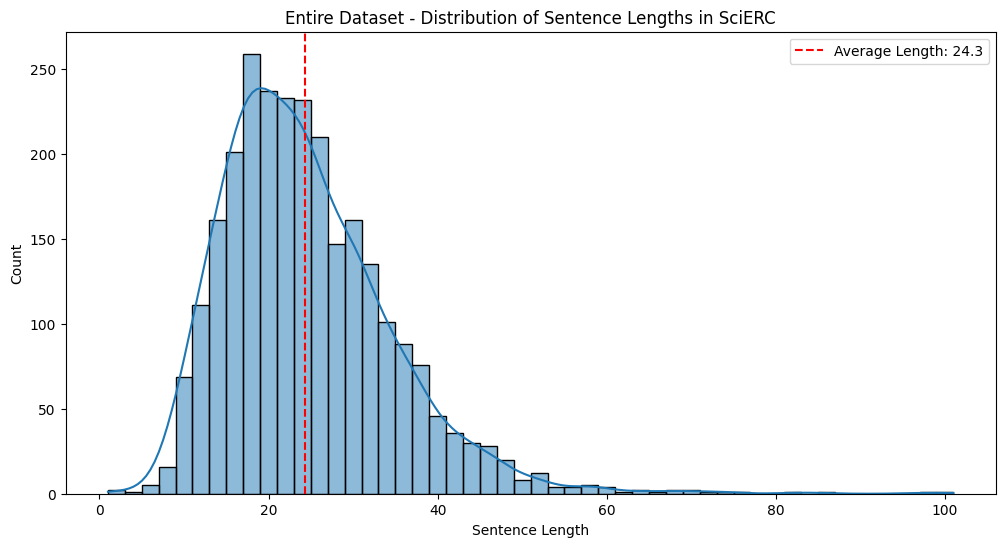

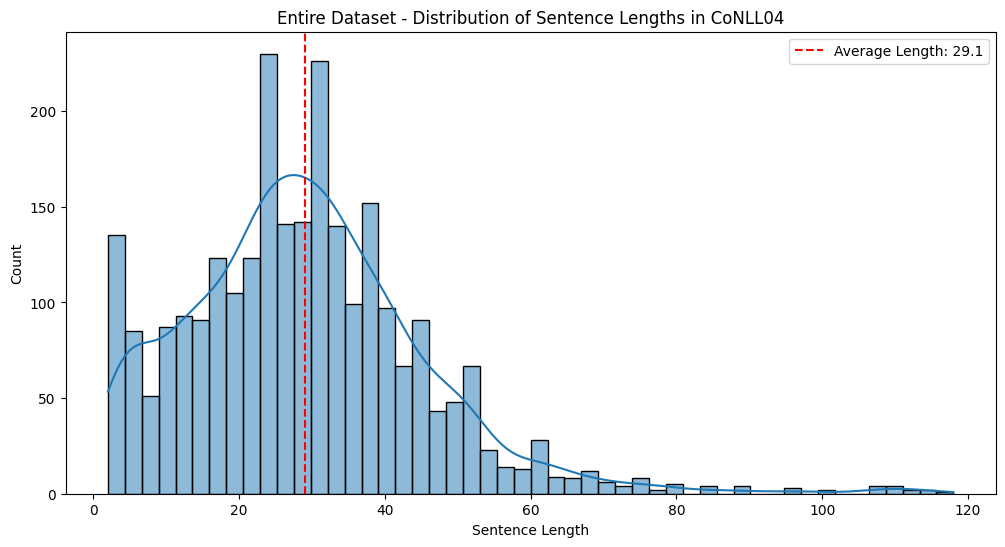

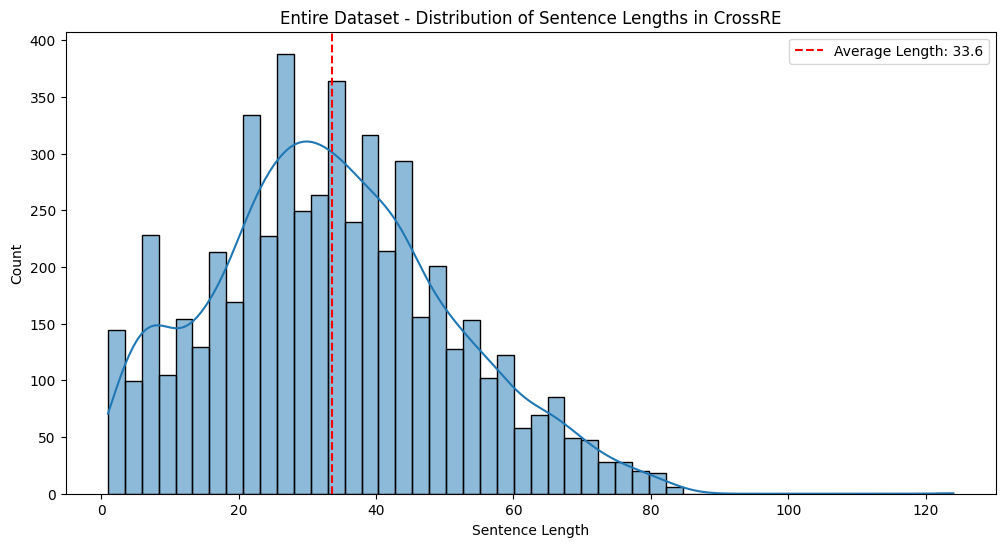

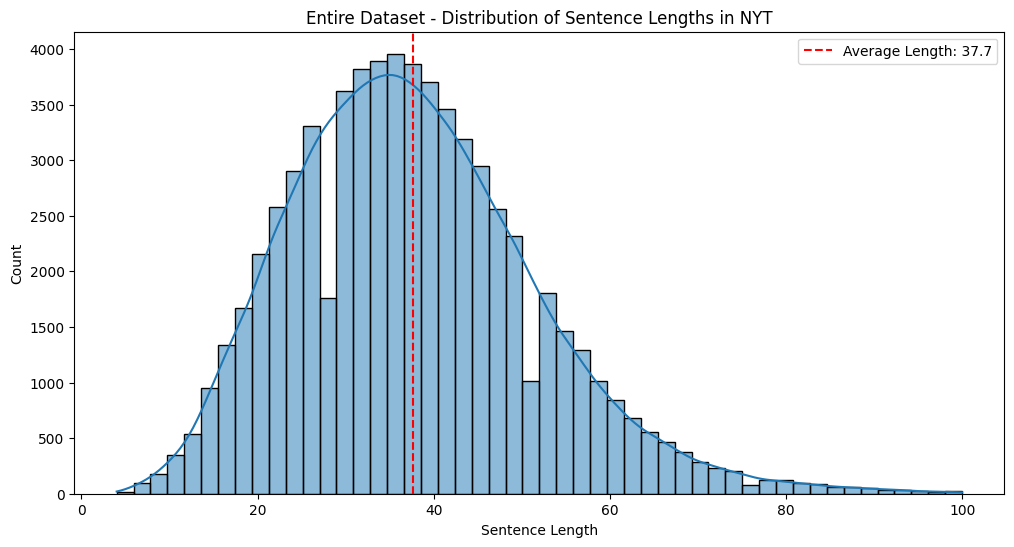

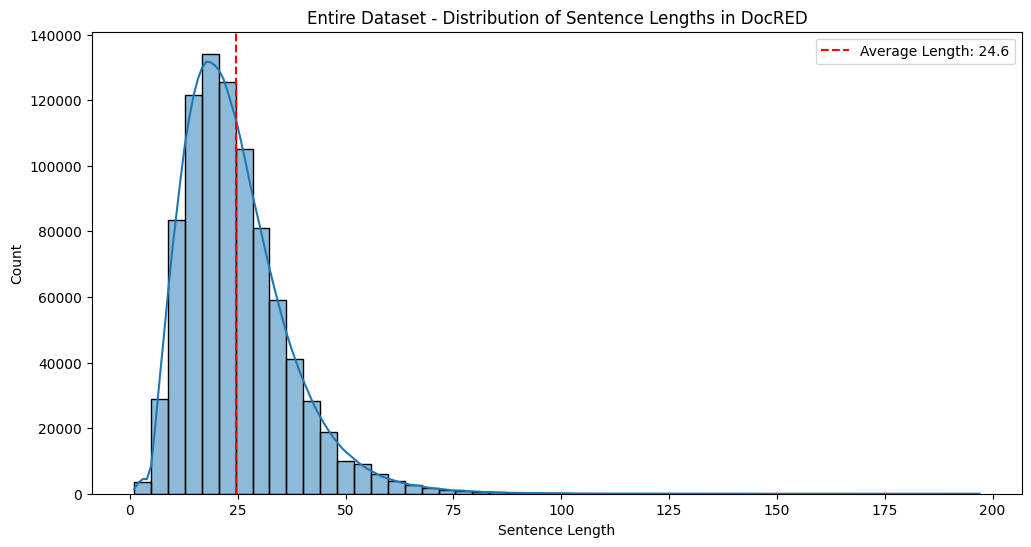

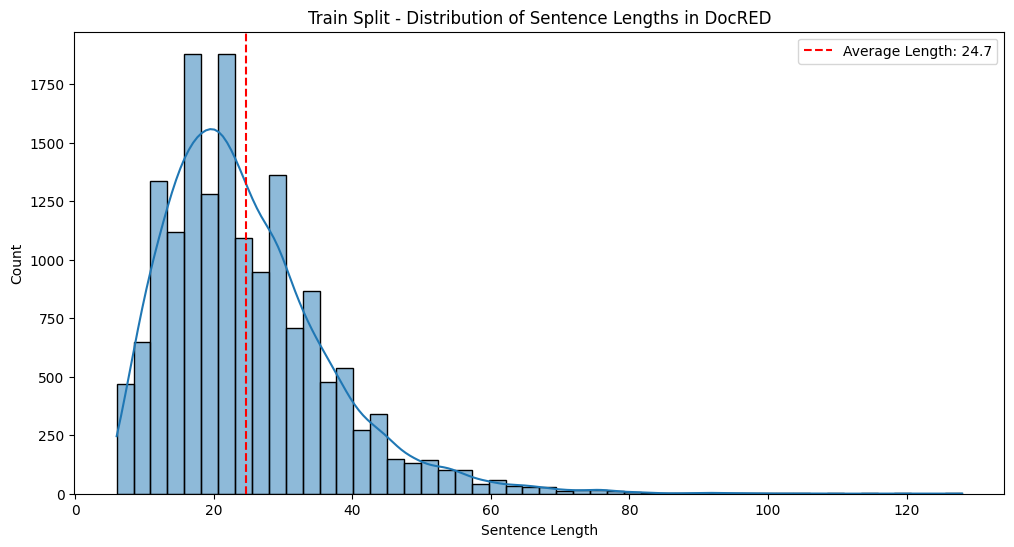

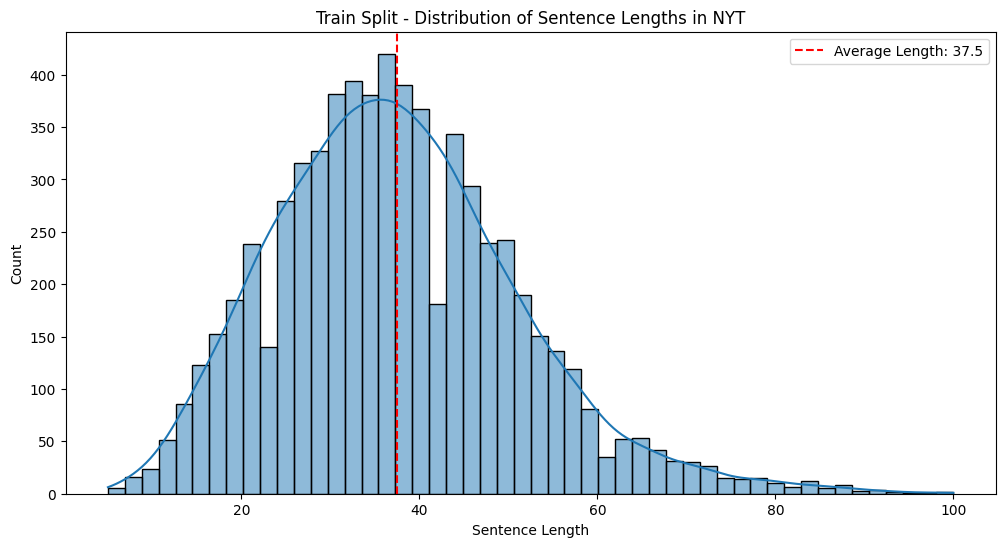

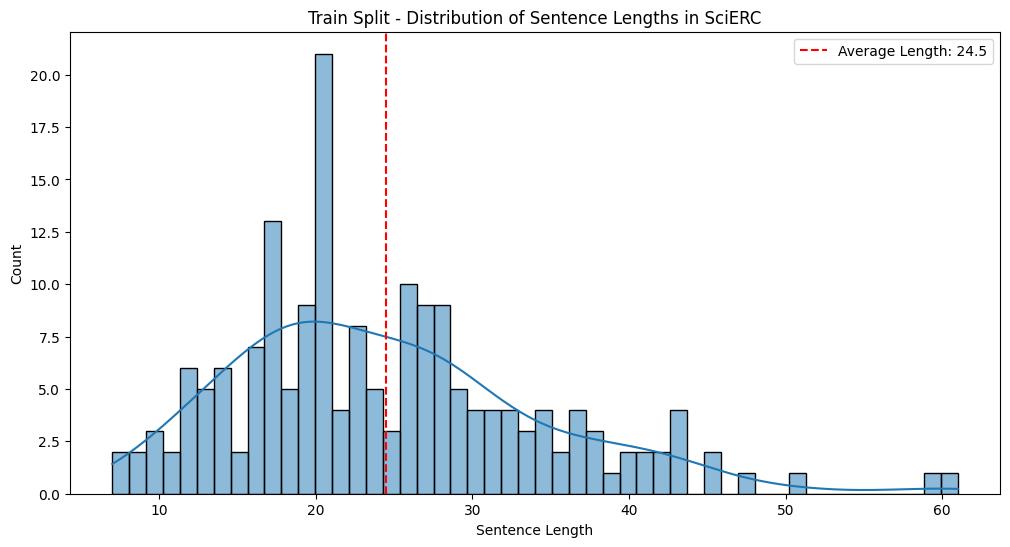

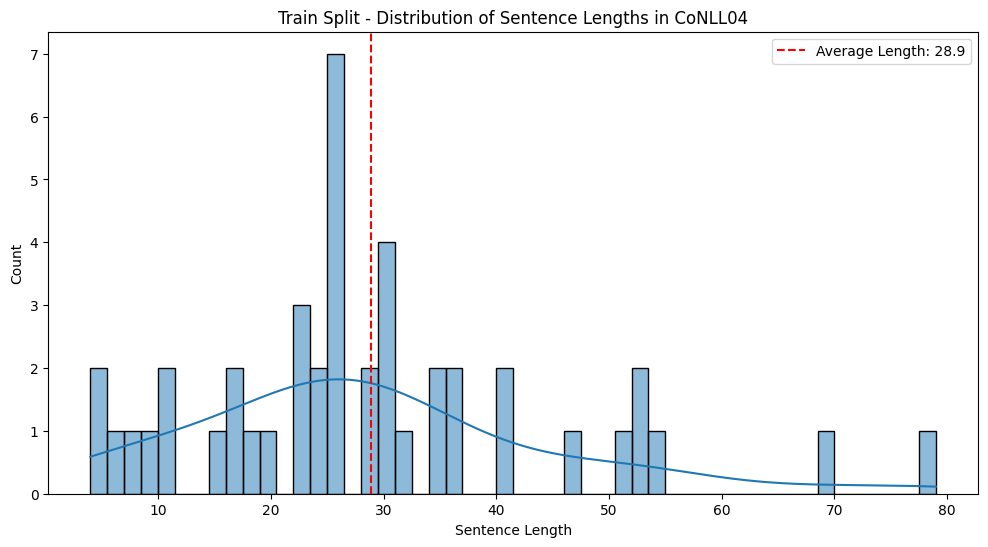

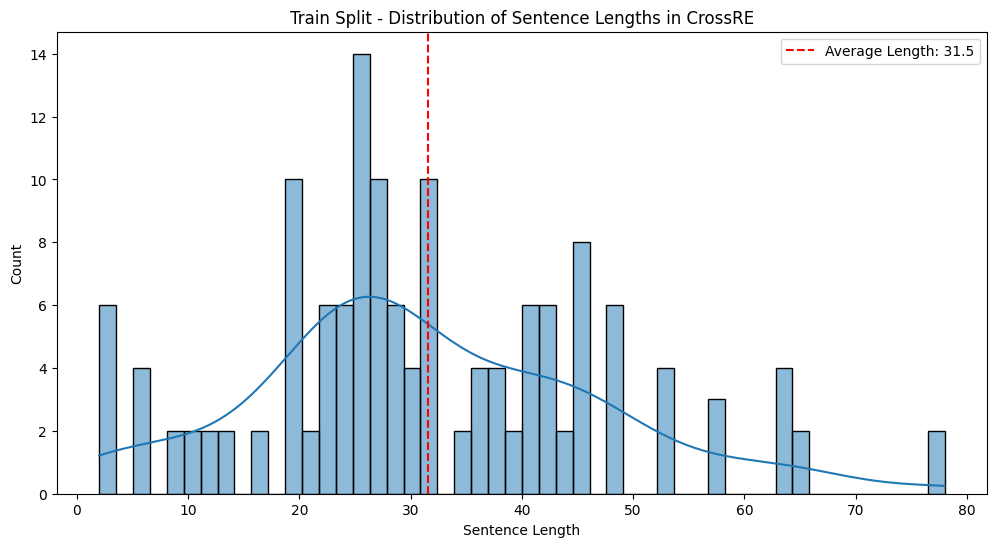

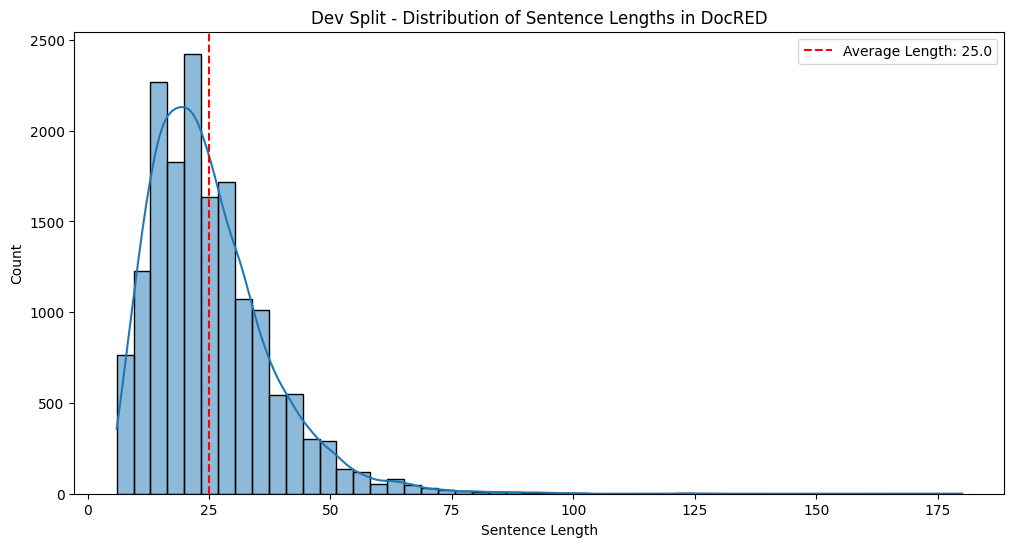

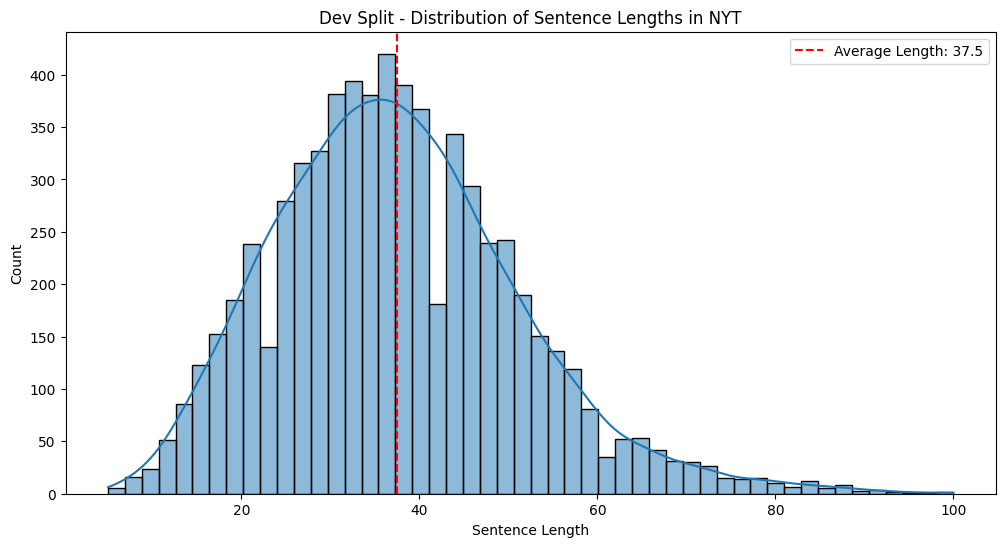

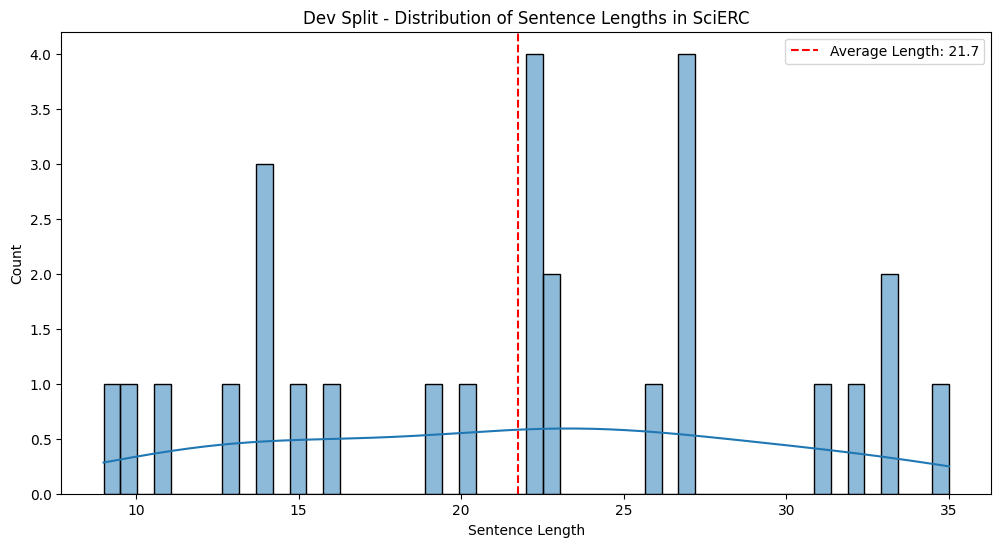

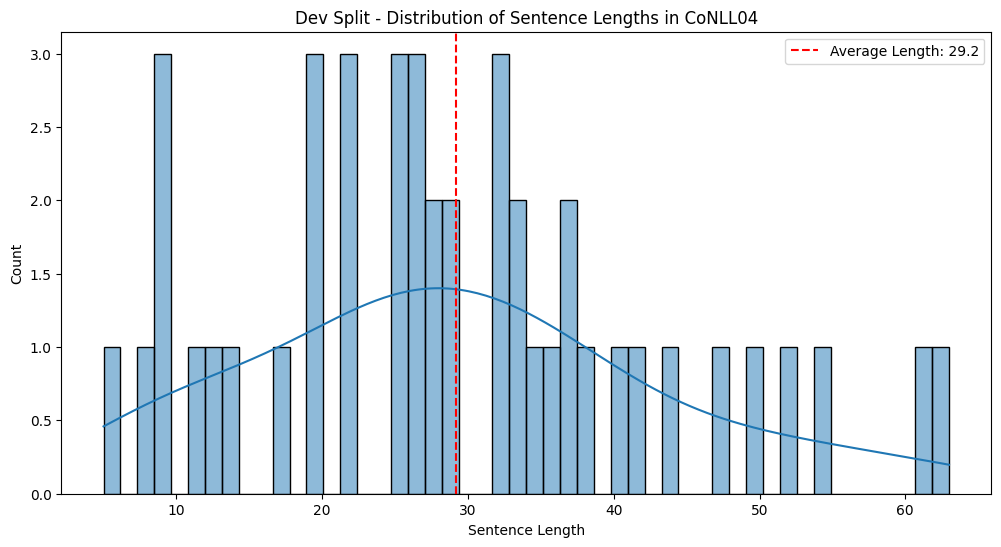

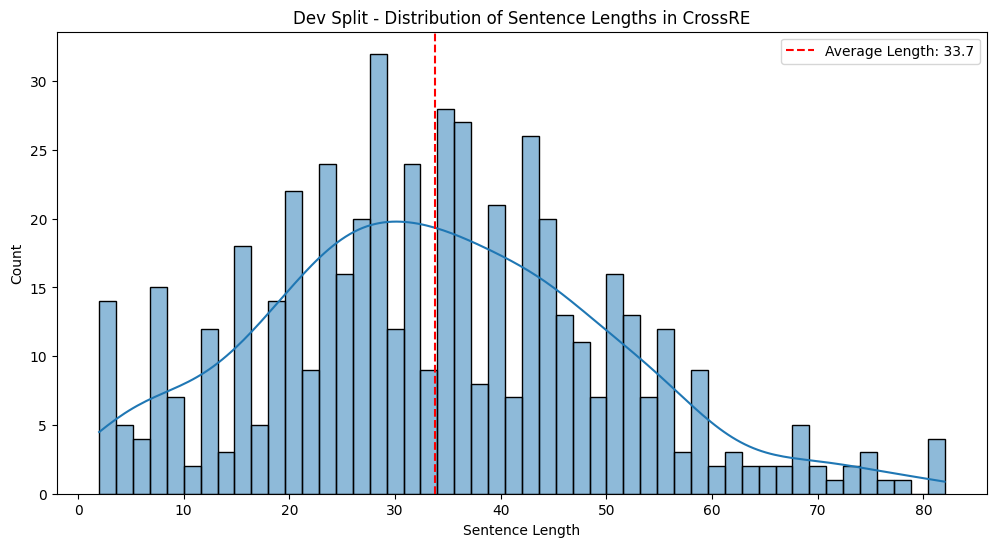

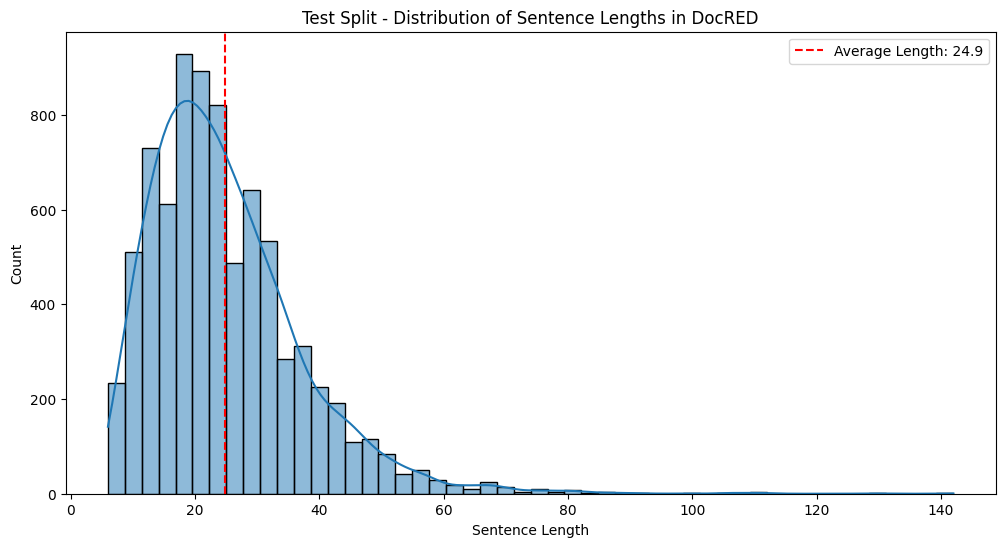

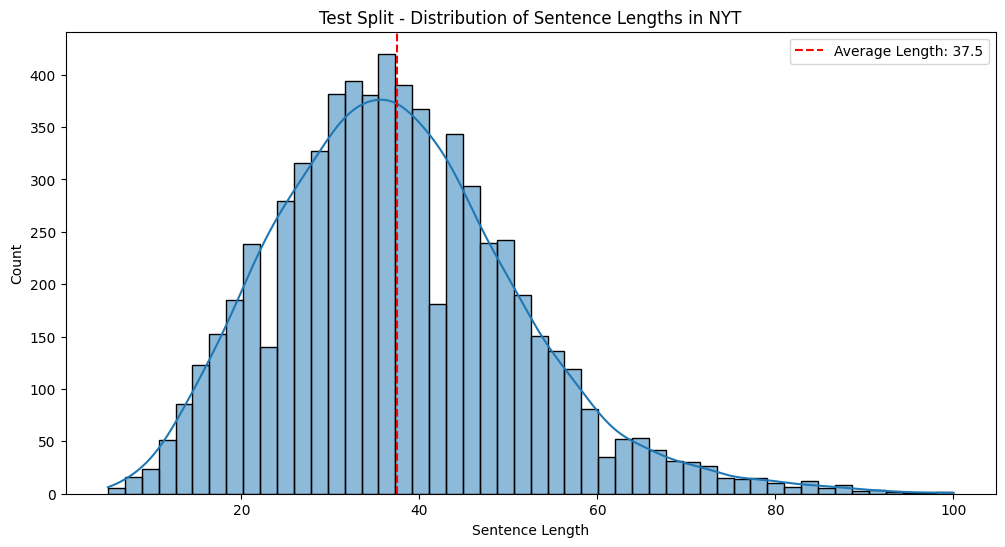

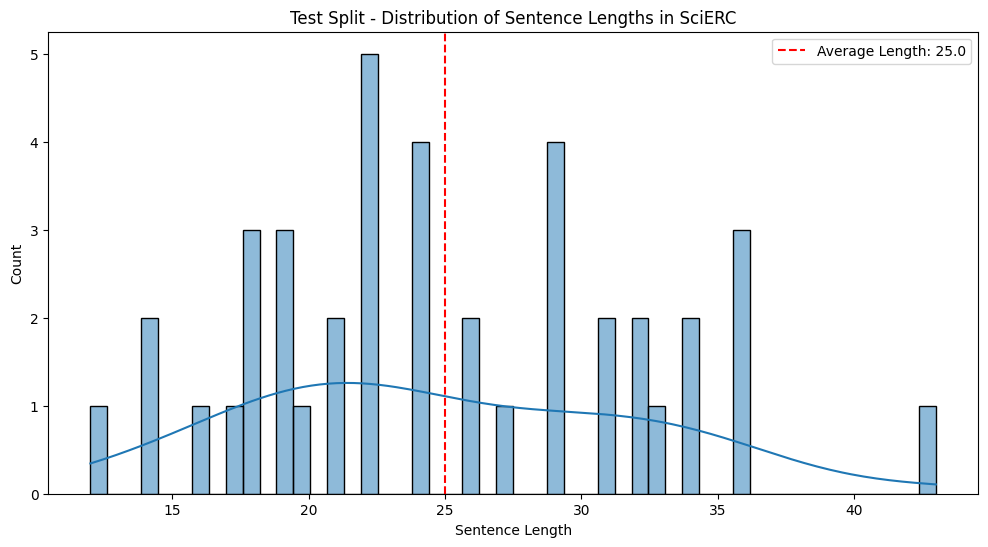

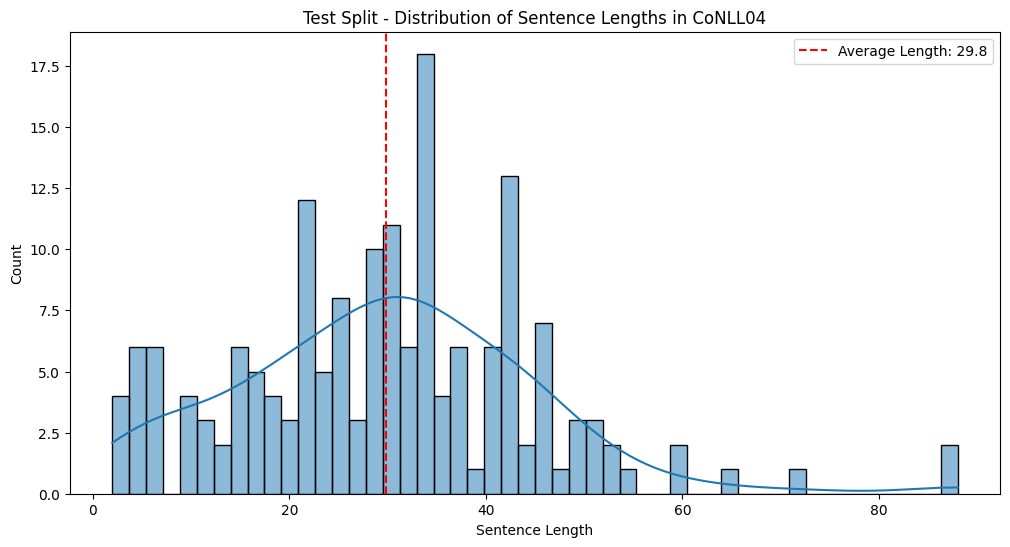

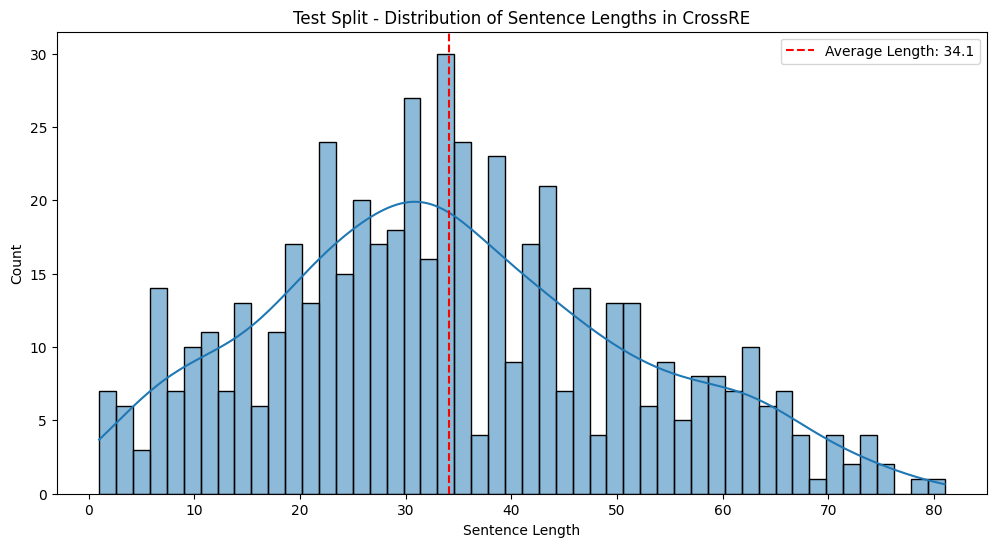

In [15]:
# Function to calculate and plot sentence length distribution
def plot_sentence_length_distribution(dataset_name, dataset_df, title_prefix):
    sent_length = []
    for sent in dataset_df['sents']:
        for s in sent:
            sent_length.append(len(s))
    avg_length = sum(sent_length) / len(sent_length)
    plt.figure(figsize=(12, 6))
    sns.histplot(sent_length, bins=50, kde=True)
    plt.axvline(x=avg_length, color='r', linestyle='--', label=f'Average Length: {avg_length:.1f}')
    plt.xlabel('Sentence Length')
    plt.ylabel('Count')
    plt.title(f'{title_prefix} - Distribution of Sentence Lengths in {dataset_name}')
    plt.legend()
    plt.show()

# Plot for the entire dataset
for dataset in df['org_dataset'].unique():
    dataset_df = df[df['org_dataset'] == dataset]
    plot_sentence_length_distribution(dataset, dataset_df, 'Entire Dataset')

# Plot for the individual splits
for split_name, split_df in [('Train Split', train), ('Dev Split', dev), ('Test Split', test)]:
    for dataset in split_df['org_dataset'].unique():
        dataset_df = split_df[split_df['org_dataset'] == dataset]
        plot_sentence_length_distribution(dataset, dataset_df, split_name)